**Table of contents**<a id='toc0_'></a>    
- [Purpose of the notebook](#toc1_)    
- [Comparison of multiplier effect with window size 30 samples](#toc2_)    
  - [Trial 55](#toc2_1_)    
  - [Trial 80](#toc2_2_)    
  - [Trial 84](#toc2_3_)    
  - [Trial 113](#toc2_4_)    
- [Comparison of multiplier effect with window size 45 samples](#toc3_)    
  - [Trial 55](#toc3_1_)    
  - [Trial 80](#toc3_2_)    
  - [Trial 84](#toc3_3_)    
  - [Trial 113](#toc3_4_)    
- [Comparison of multiplier effect with window size 60 samples](#toc4_)    
  - [Trial 55](#toc4_1_)    
  - [Trial 80](#toc4_2_)    
  - [Trial 84](#toc4_3_)    
  - [Trial 113](#toc4_4_)    
- [Conclusion](#toc5_)    
- [Participant 201, window 60, multiplier 6](#toc6_)    
- [Demonstration of pipeline effectiveness with velocity MAD window=60, multiplier=6 and size MAD window=60, multiplier=4.5](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Purpose of the notebook](#toc0_)

It's an EDA on multiplier for MAD method of artefact removal based on pupil velocity. Motivation: velocity has a heavy-tailed one-sided distribution due to the fact it's calculated as an absolute value. Therefore, the usual proportion of n = 1.5 ~= 1 standard deviation in the formula threshold = median + n x MAD may not be appropriate. For example, as shown [here](https://aakinshin.net/posts/mad-caveats/), for the heavy-tailed Frechet distribution n=4.45 covers only 83.3% of it, instead of the 99.7% that we'd want based on 3 sigma rule. Because of this, I decided to compare velocity artefact removal with rolling MAD visually on example trials with artefacts/without artefact, for values 4.5, 6, 7.5. In addition, I will look closer at window size in order to minimize false artefact detection e.g. at stimulus onset, where pupil size changes rapidly from relatively steady baseline signal. Data used here was created with load_and_resample.py script.

I chose to demonstrate the effects of MAD velocity artefact removal on trials 55, 80, 84 and 113 from participant 213, in which I observed spike forms that should be at least partially removed by this method of artefact cleaning.

In [1]:
import pupilprep_utilities.preprocessing_utils as prep
import pupilprep_utilities.visualisation_utils as vis
import os
import pandas as pd

In [2]:
participant_id = 213

data_dir = "./results/resampled/"  # directory with resampled data
data_suffix = "_nonan_30_resampled_data.csv"  # name of file with 30 Hz resampled data from participant 2xx, name format: 2xxdata_suffix

data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
data_df = pd.read_csv(data_path)

multipliers_to_compare = [4.5, 6, 7.5]
windows_to_compare = [30, 60, 45]
trials_to_vis = [55, 80, 84, 113]

# <a id='toc2_'></a>[Comparison of multiplier effect with window size 30 samples](#toc0_)

The trials I choose to visualise are 55, 80, 84, 113. Multipliers are 4.5, 6, 7.5. Window size for this section is 30 samples, which corresponds to 1 s.

## <a id='toc2_1_'></a>[Trial 55](#toc0_)

In this trial, we observe a downward spike-like form around 15.5 s. In this case, the best multiplier seems to be 7.5 as it removes the same spike points as 4.5 and 6, but minimizes false detections like around 10 s.

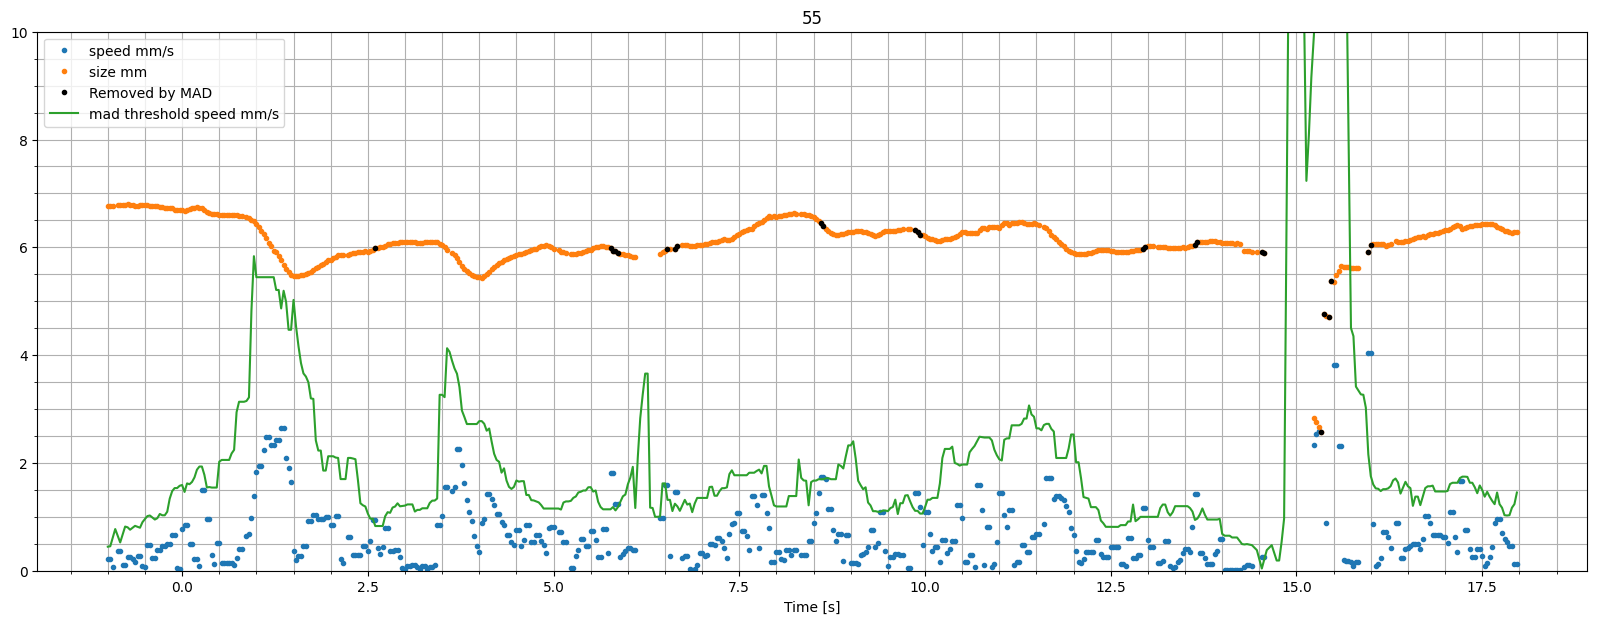

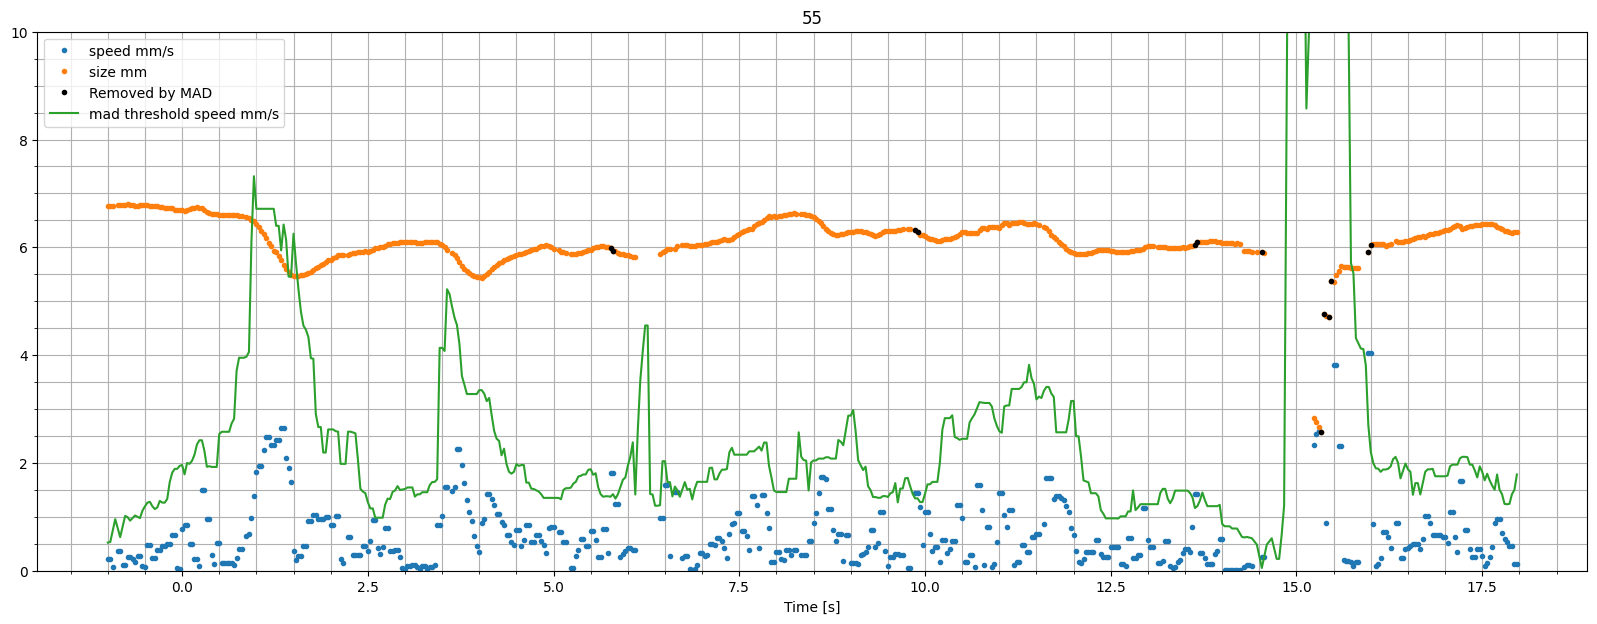

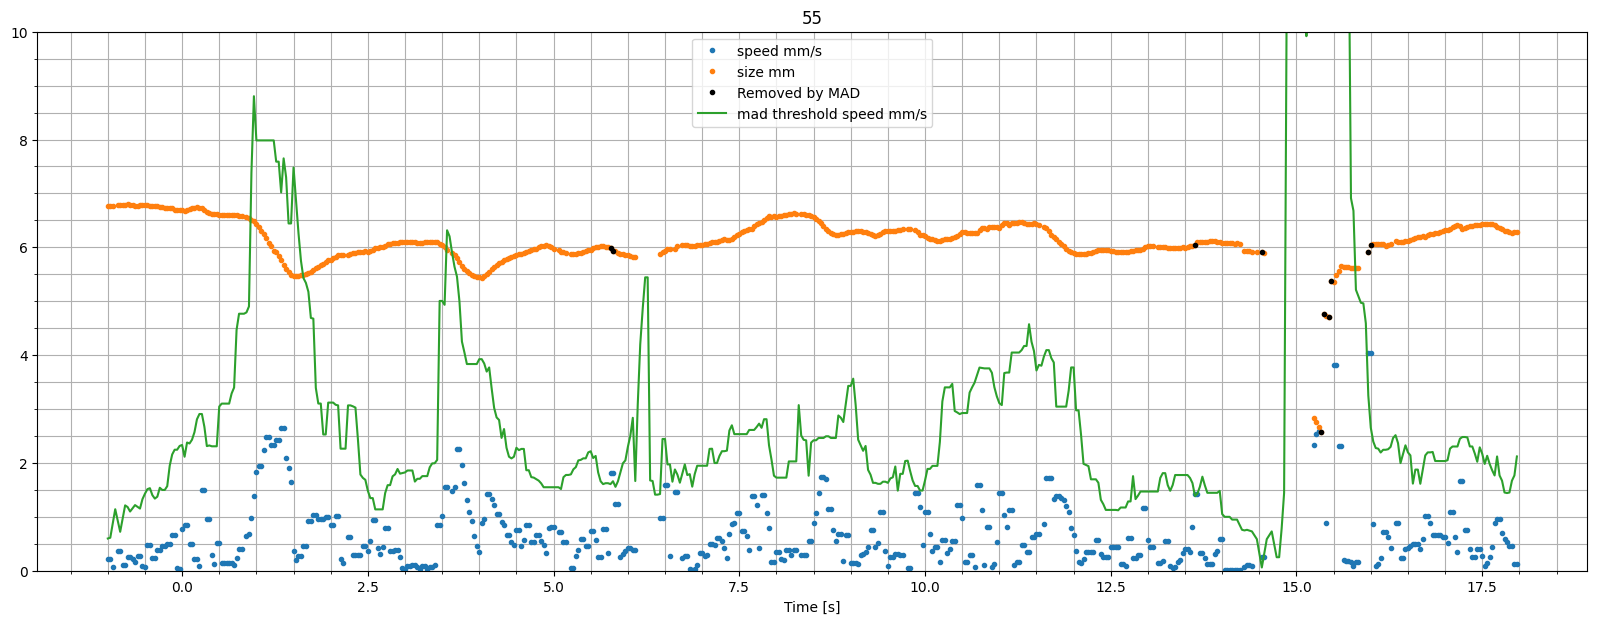

In [3]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[55], window=windows_to_compare[0], multiplier=multiplier
    )

## <a id='toc2_2_'></a>[Trial 80](#toc0_)

Here there is a downward spike around 14.5 s. In this case, the best multiplier seems to be 4.5 as it removes a bit more points from the spike, especially at the downward edge which can be a problematic zone to clean up with size-based methods.

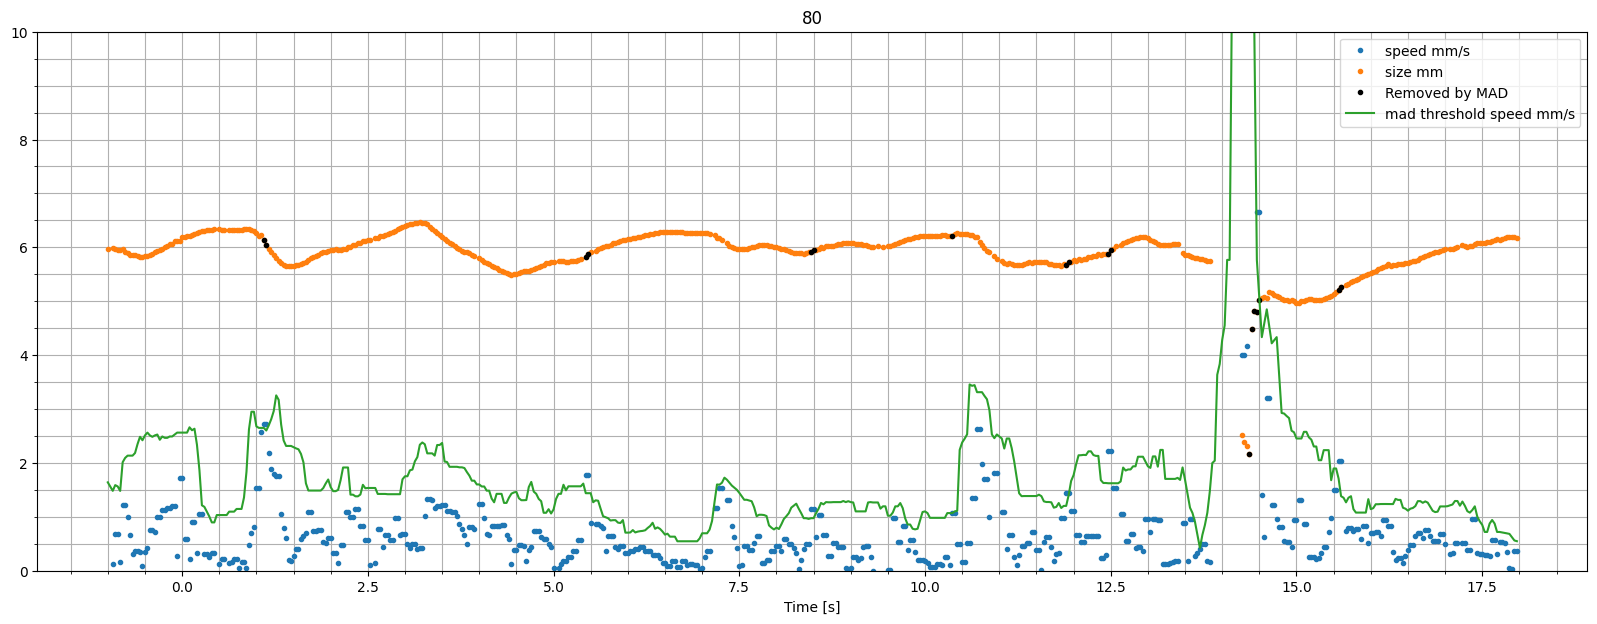

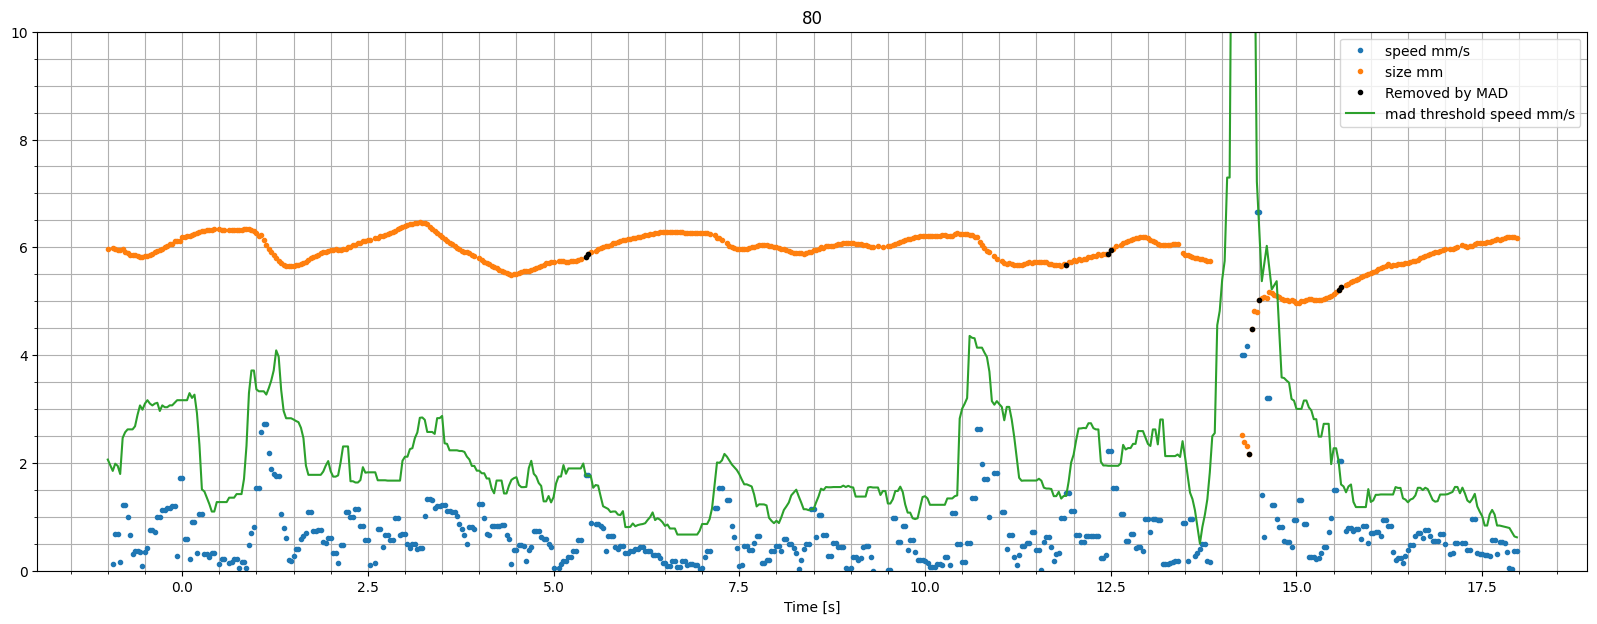

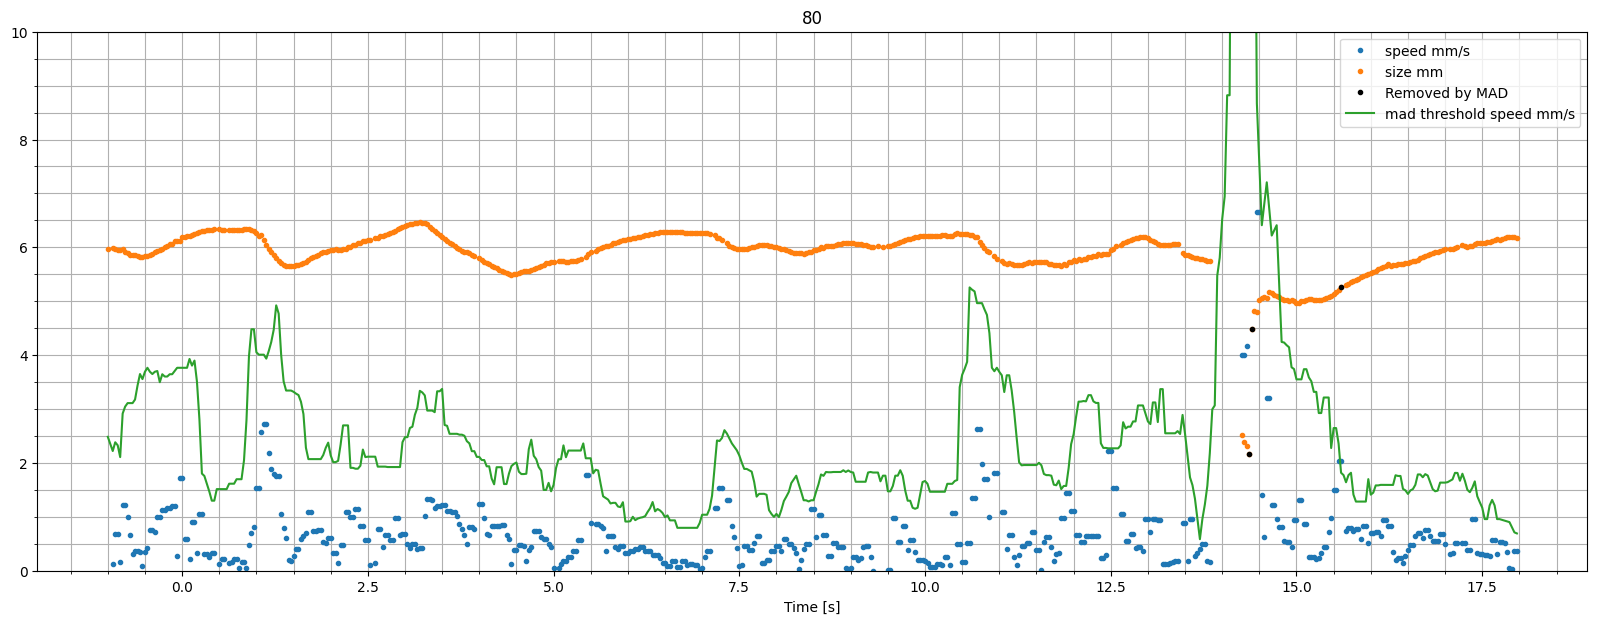

In [4]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[80], window=windows_to_compare[0], multiplier=multiplier
    )

## <a id='toc2_3_'></a>[Trial 84](#toc0_)

Here we observe a spike around 11 s. Here the best multiplier is 7.5 again, it removes the same spike points as lower values while retaining more of the good signal.

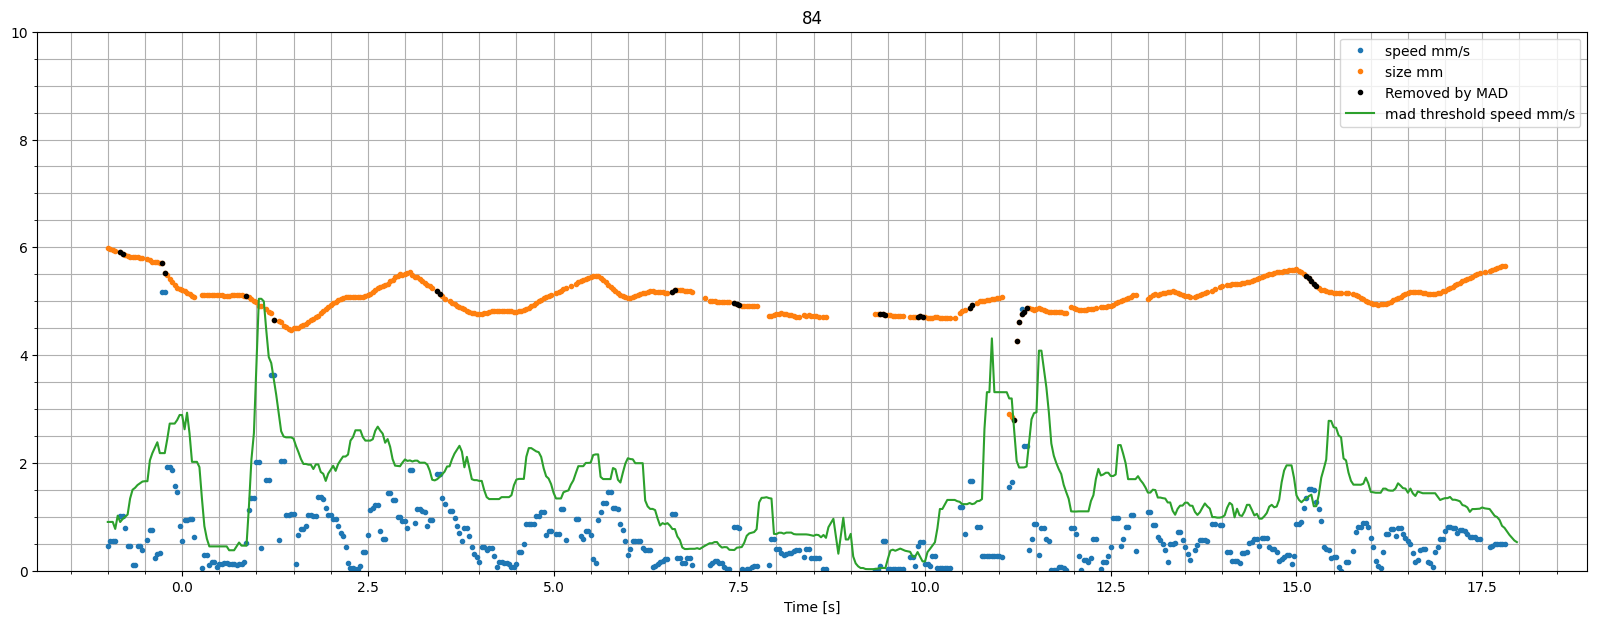

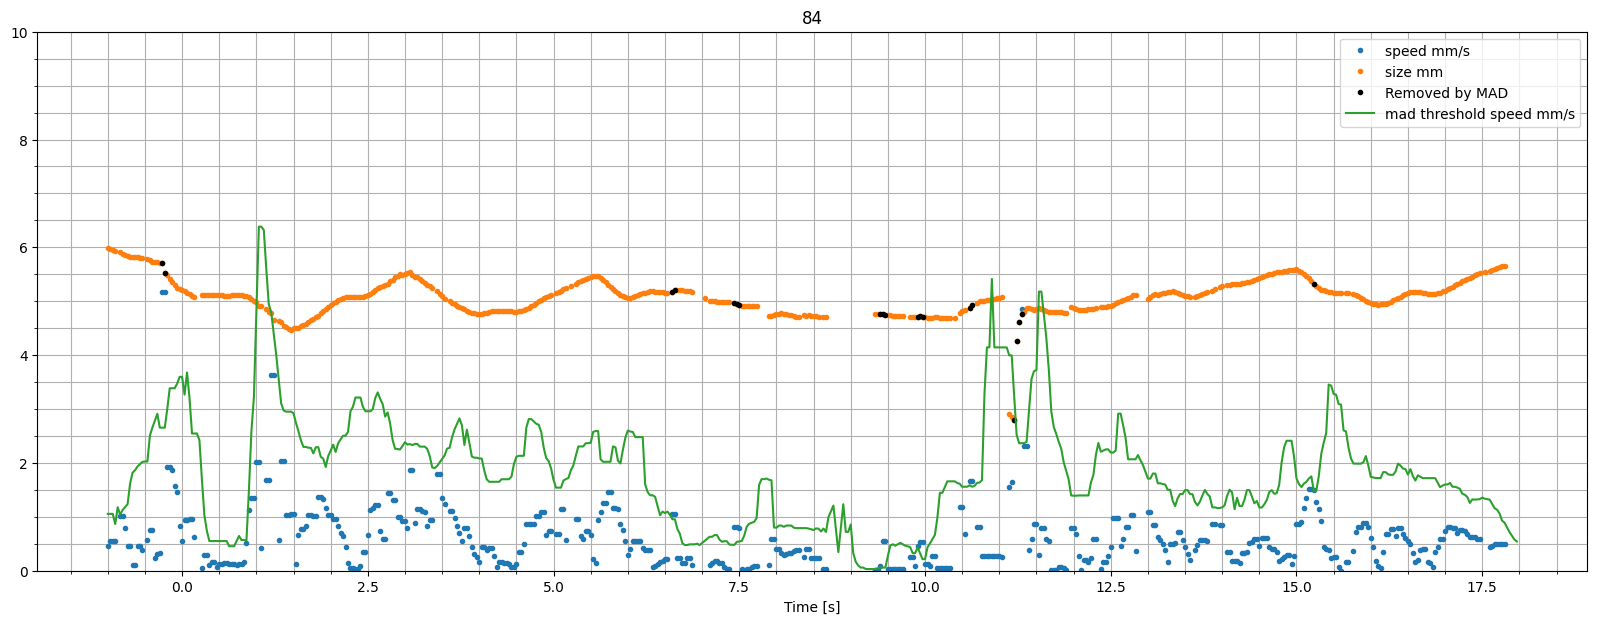

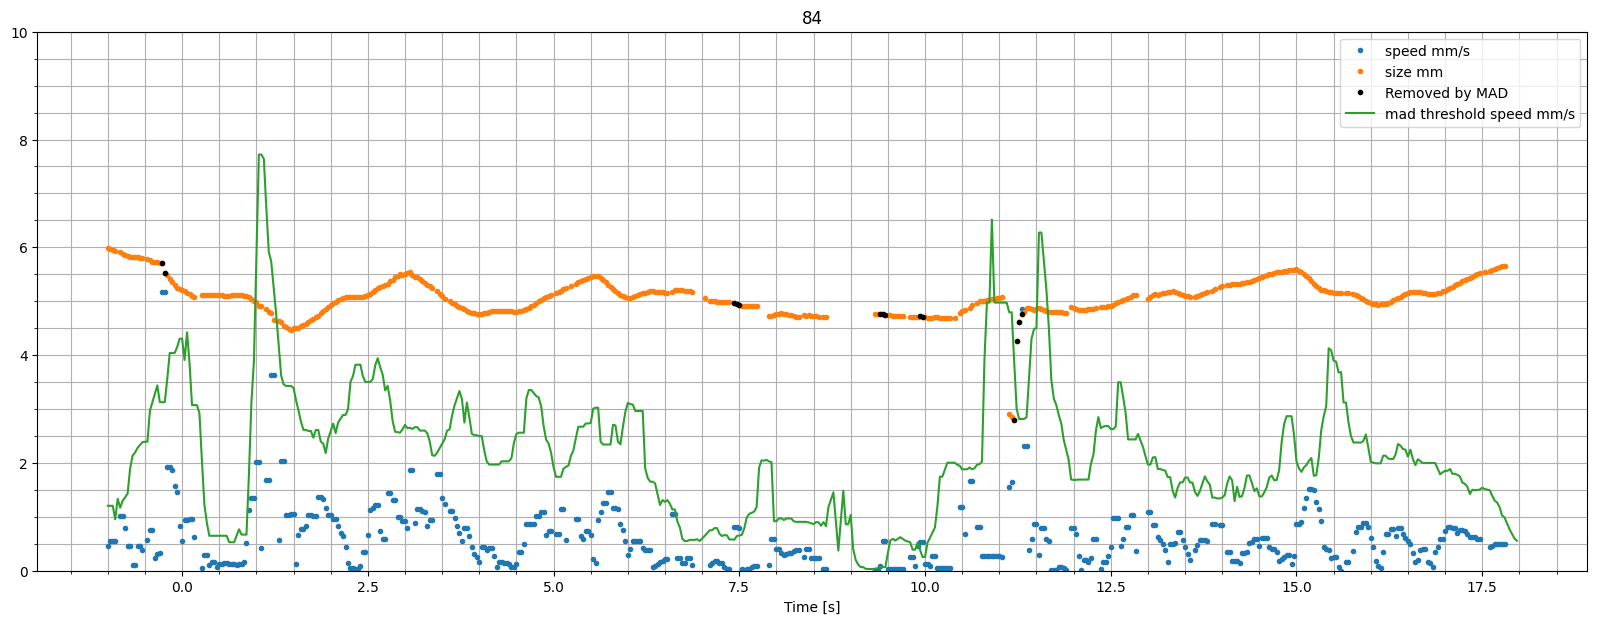

In [5]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[84], window=windows_to_compare[0], multiplier=multiplier
    )

## <a id='toc2_4_'></a>[Trial 113](#toc0_)

There is a small spike around 1.5 s.Again, 7.5 works the best - it doesn't remove the whole slope right before the artefact.

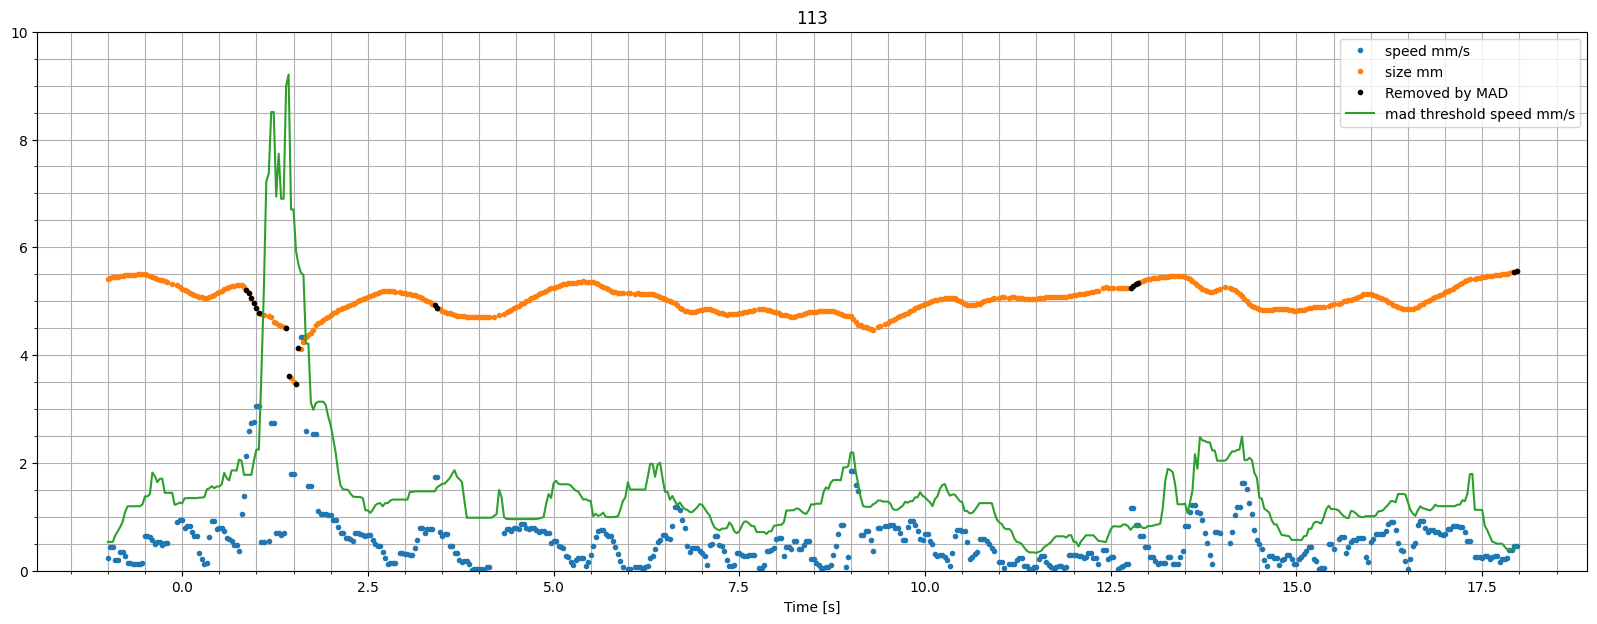

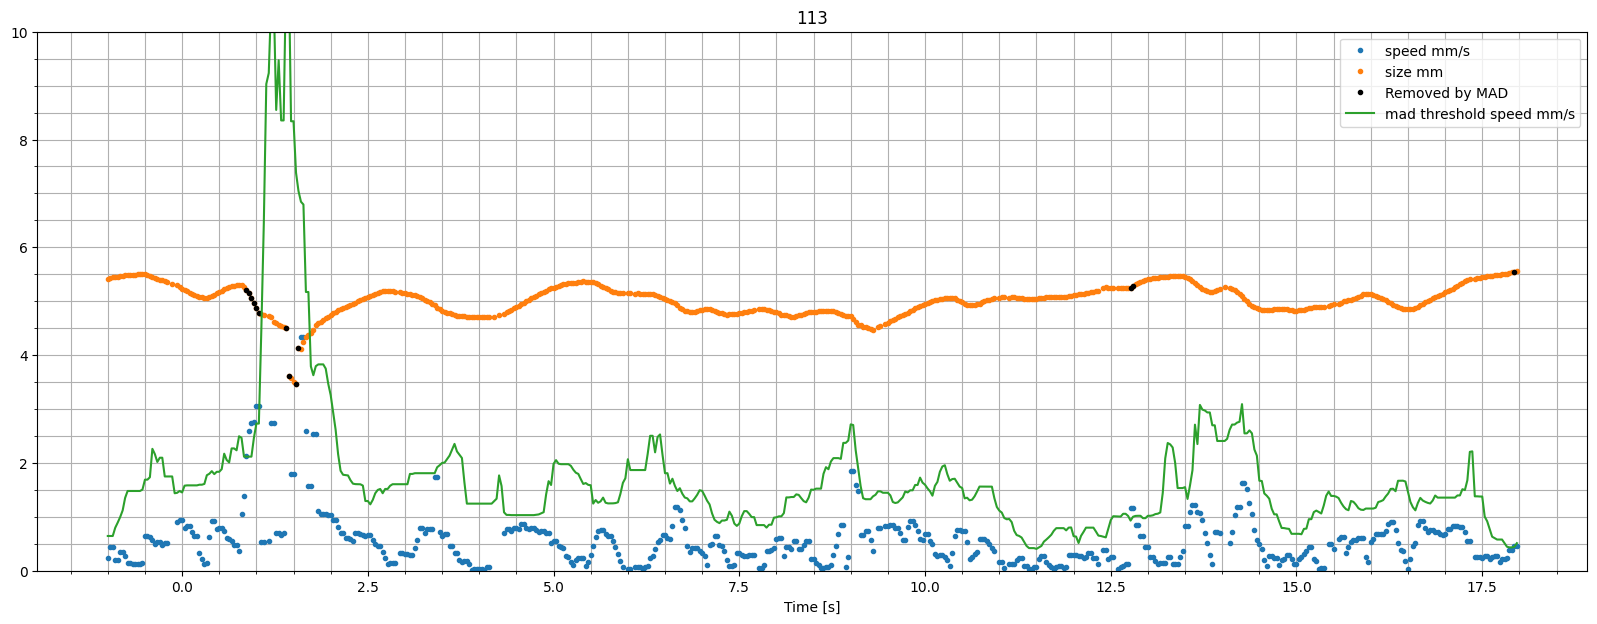

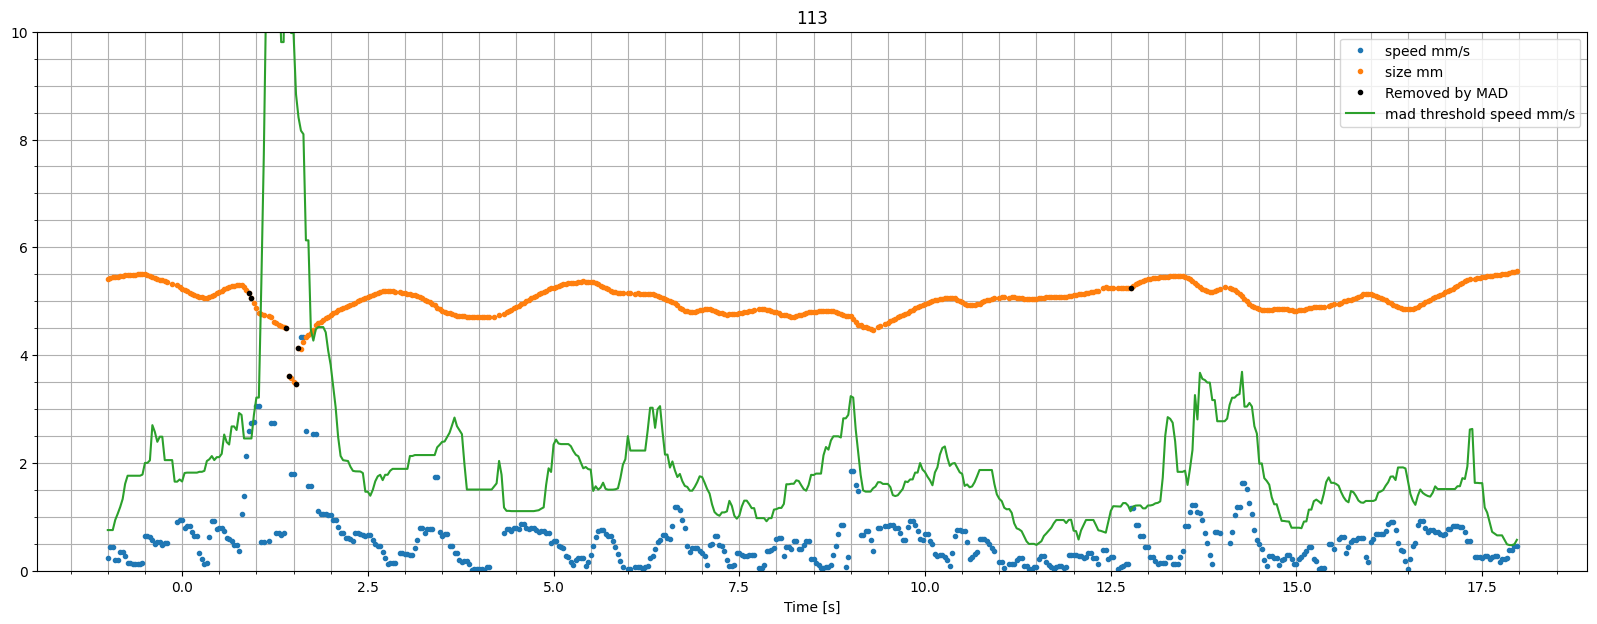

In [6]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df,
        trials_to_vis=[113],
        window=windows_to_compare[0],
        multiplier=multiplier,
    )

# <a id='toc3_'></a>[Comparison of multiplier effect with window size 45 samples](#toc0_)

The trials I choose to visualise are 55, 80, 84, 113. Multipliers are 4.5, 6, 7.5. Window size for this section is 45 samples, which corresponds to 1.5 s.

## <a id='toc3_1_'></a>[Trial 55](#toc0_)

In this trial, we observe a downward spike-like form around 15.5 s. Multipliers 7.5 or 6 have less false detections, while removal around the spike is similar. 4.5 removes an additional point on the edge of the spike.

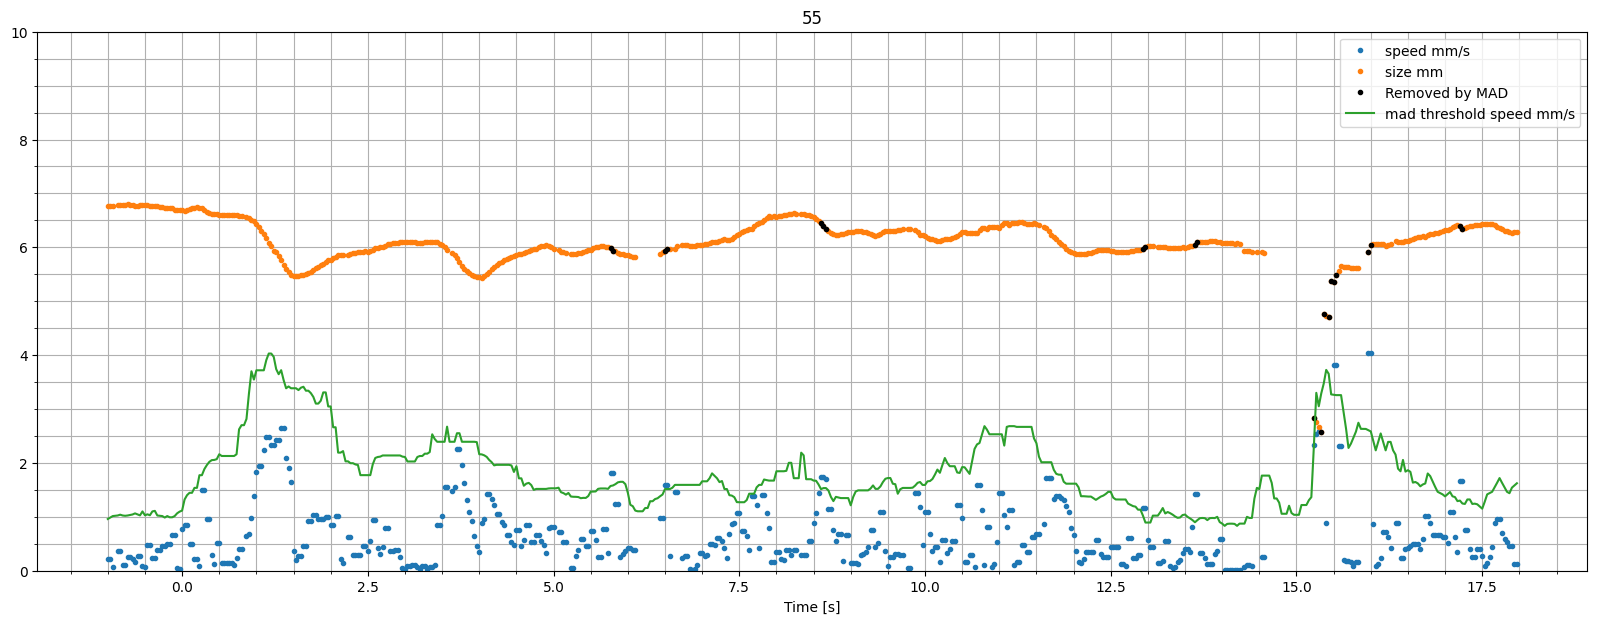

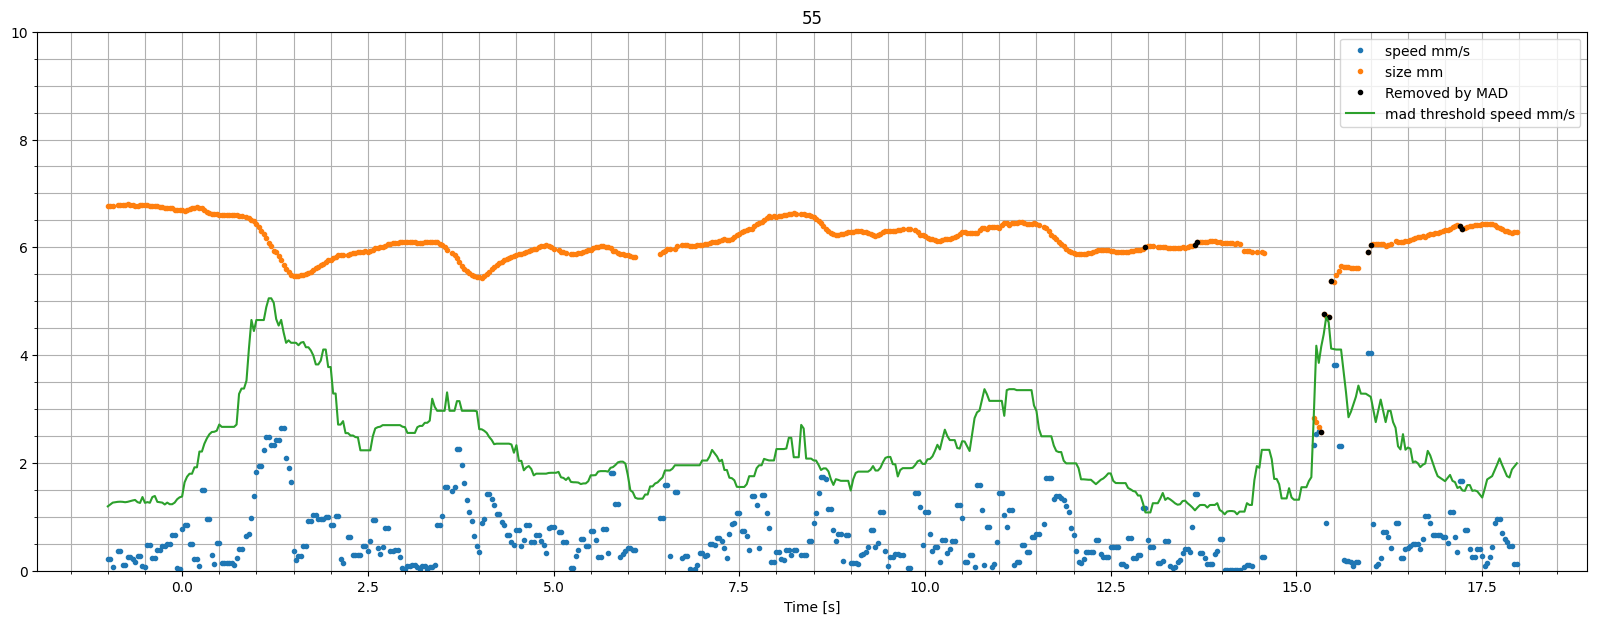

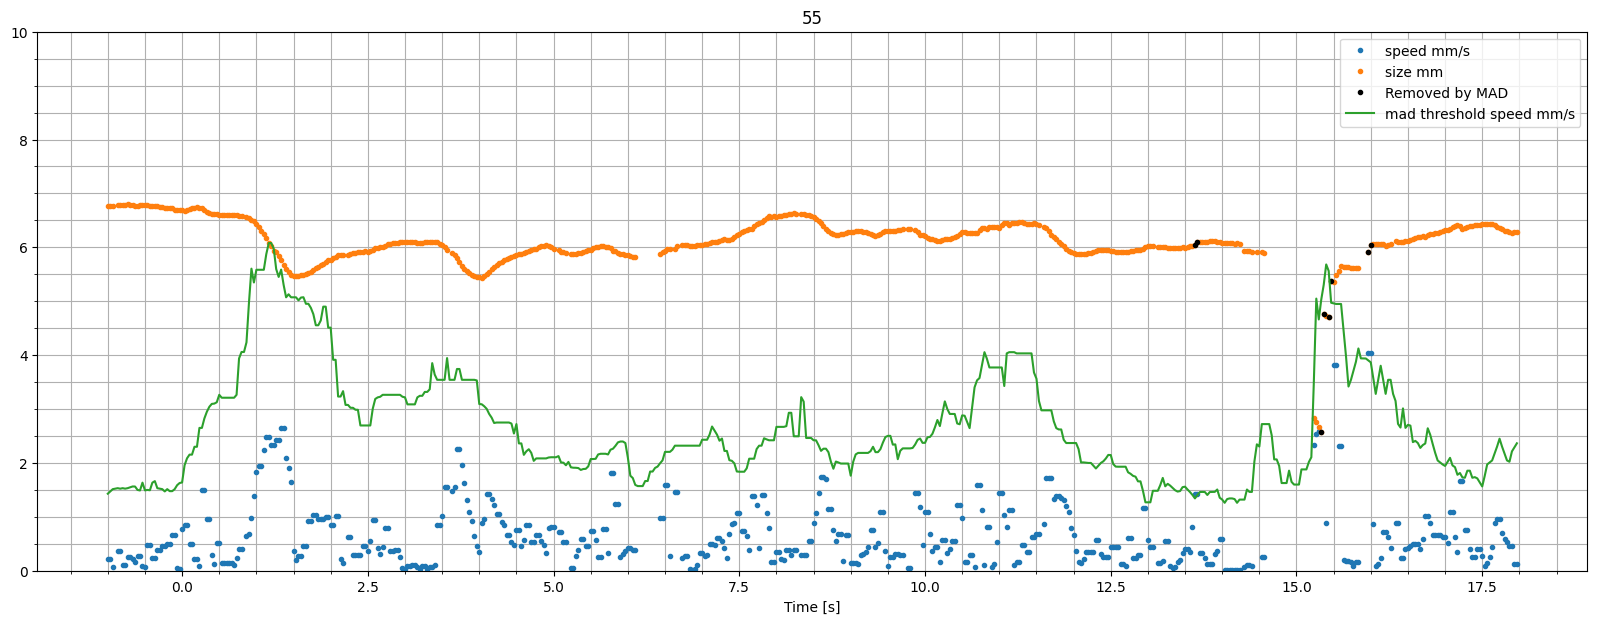

In [7]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[55], window=windows_to_compare[1], multiplier=multiplier
    )

## <a id='toc3_2_'></a>[Trial 80](#toc0_)

Here there is a downward spike around 14.5 s. Here 6 seems to work the best as it minimizes false detections to almost similar level as 7, while cleaning up more of the spike.

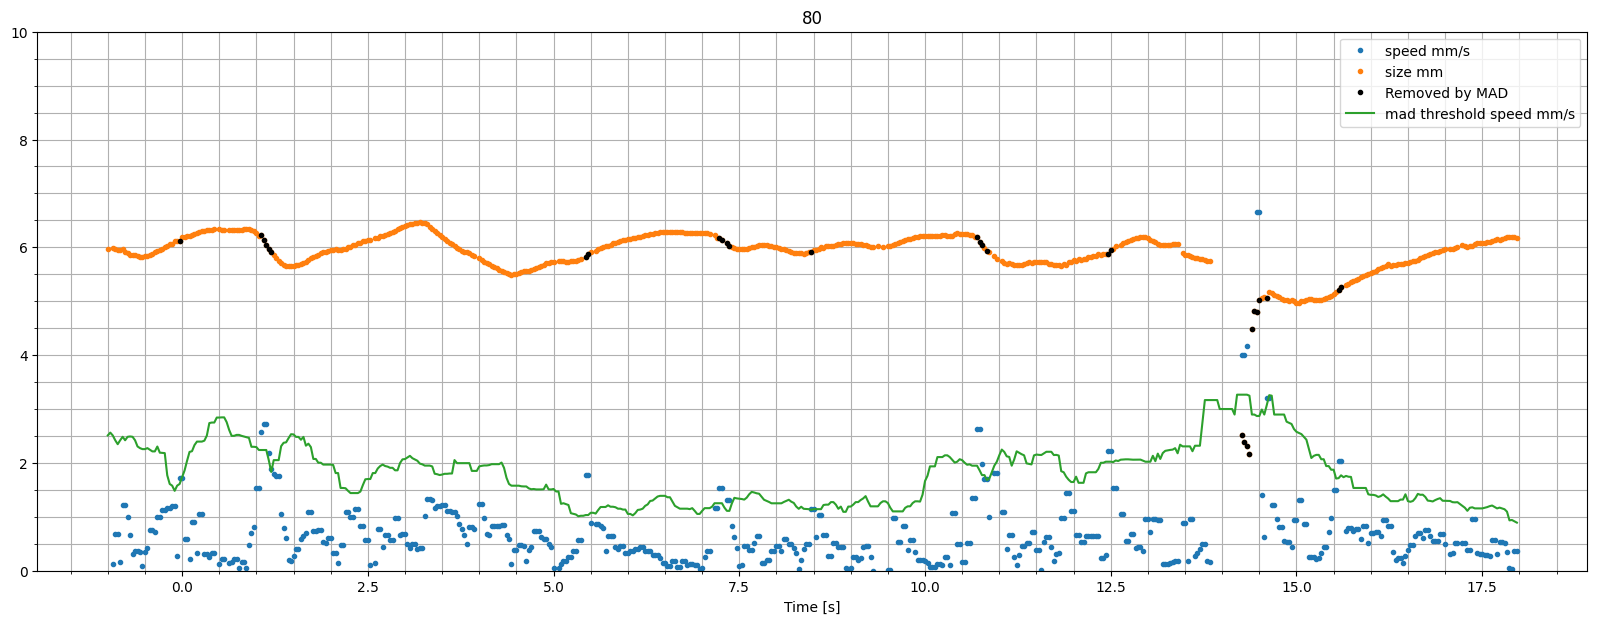

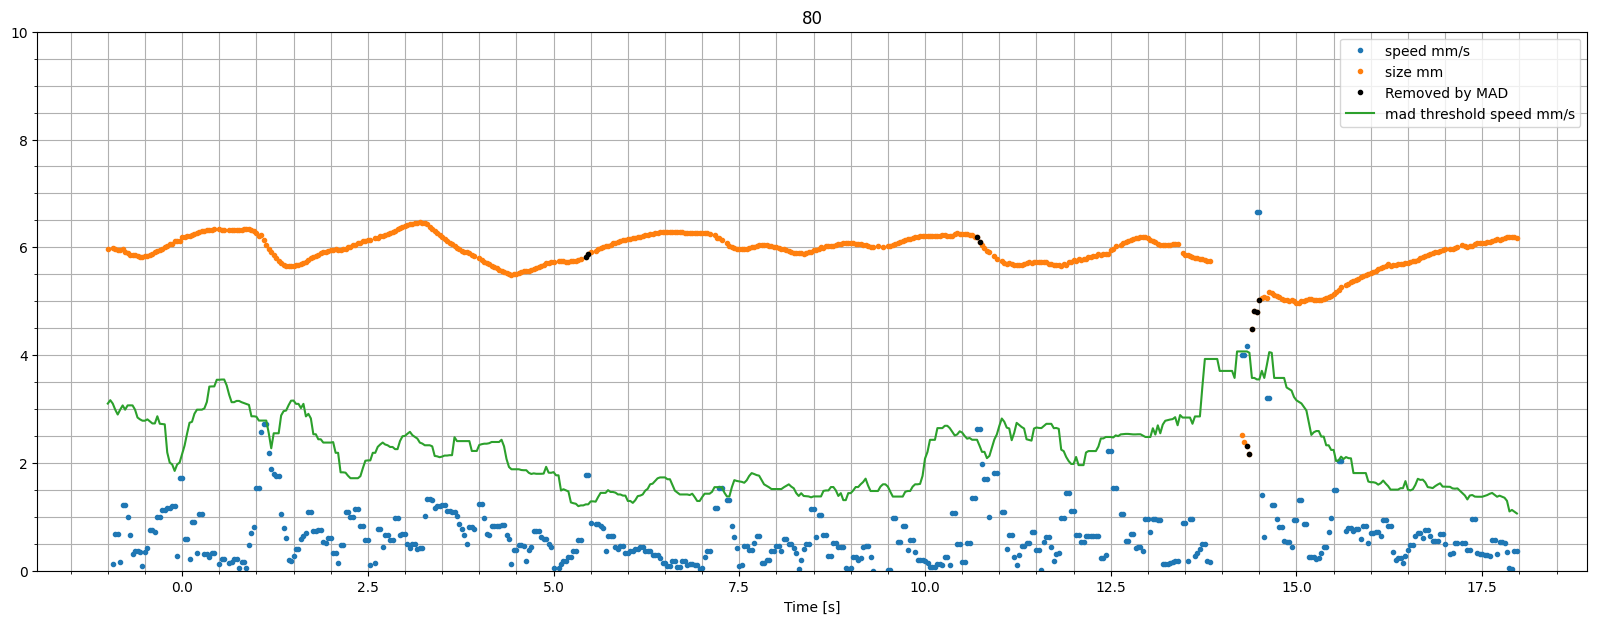

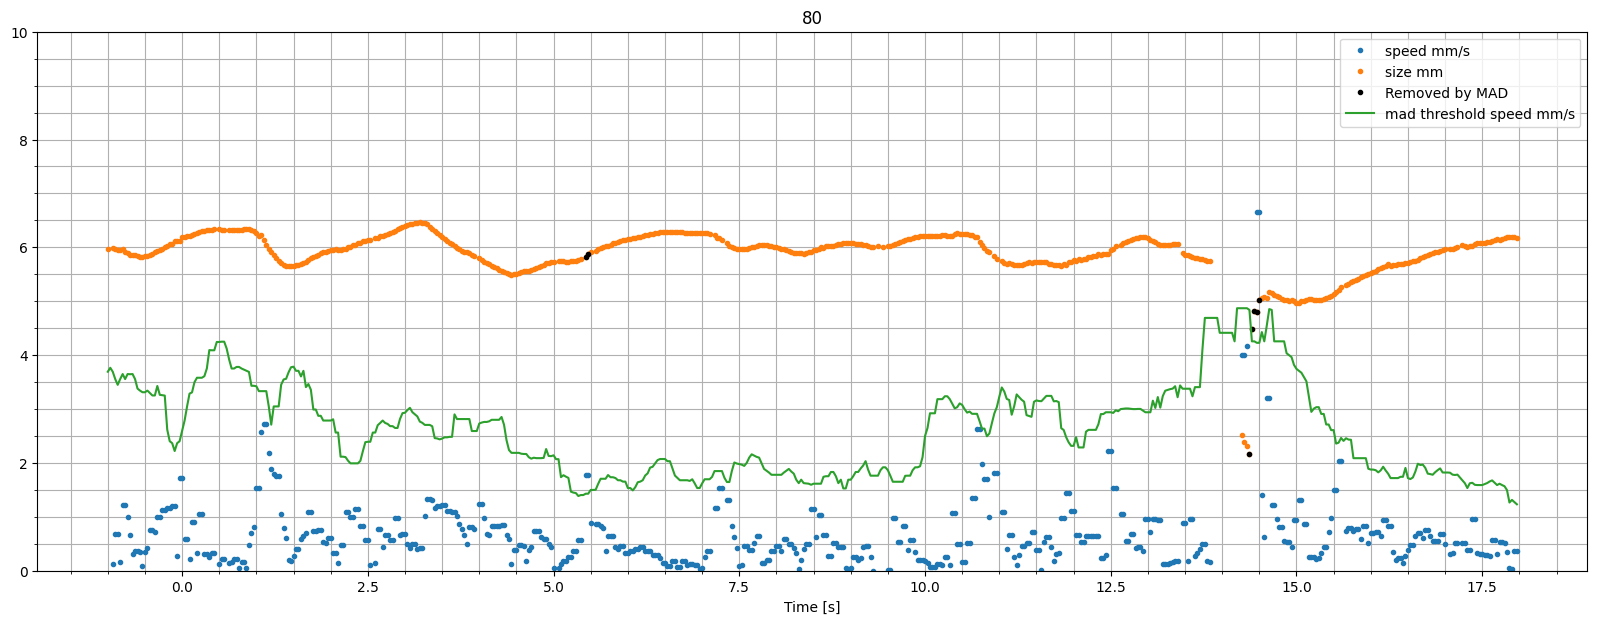

In [8]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[80], window=windows_to_compare[1], multiplier=multiplier
    )

## <a id='toc3_3_'></a>[Trial 84](#toc0_)

Here we observe a spike around 11 s. 6 and 7.5 remove the same points from the spike as 4.5, while having less false detections.

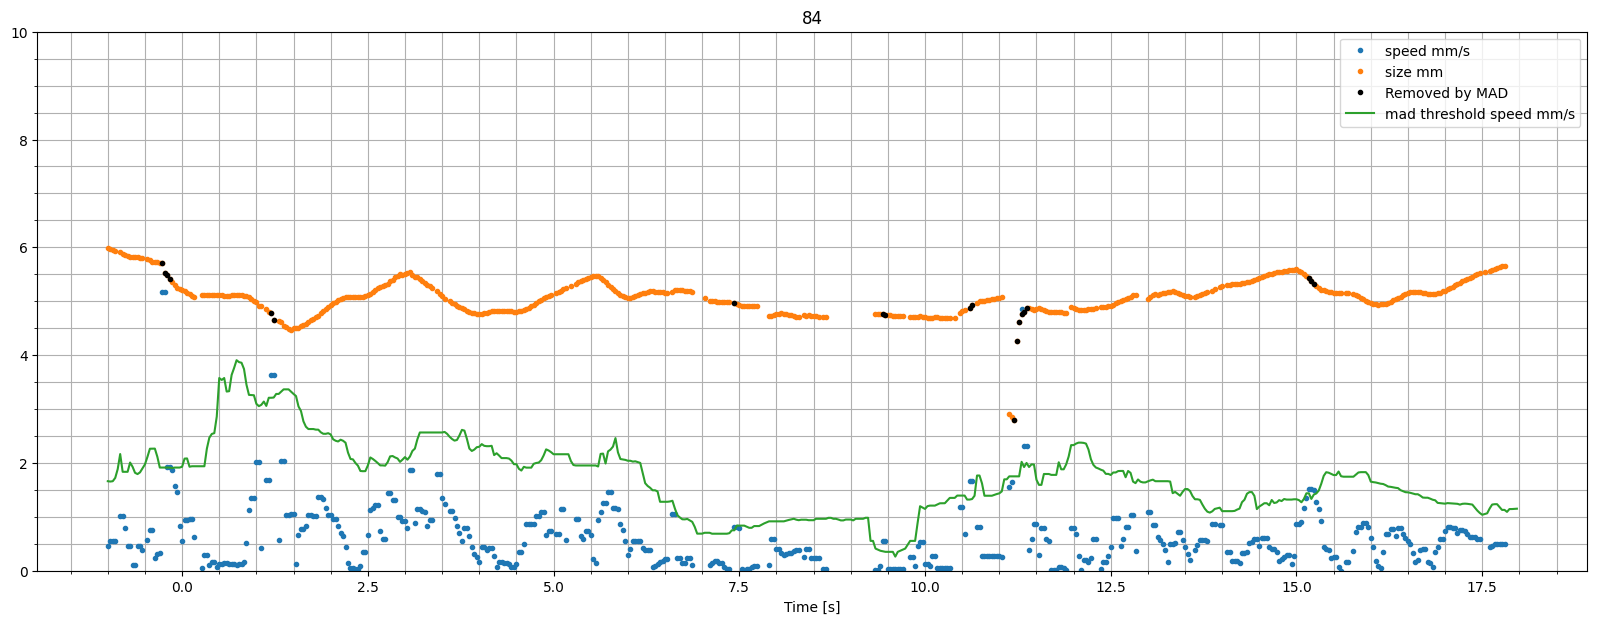

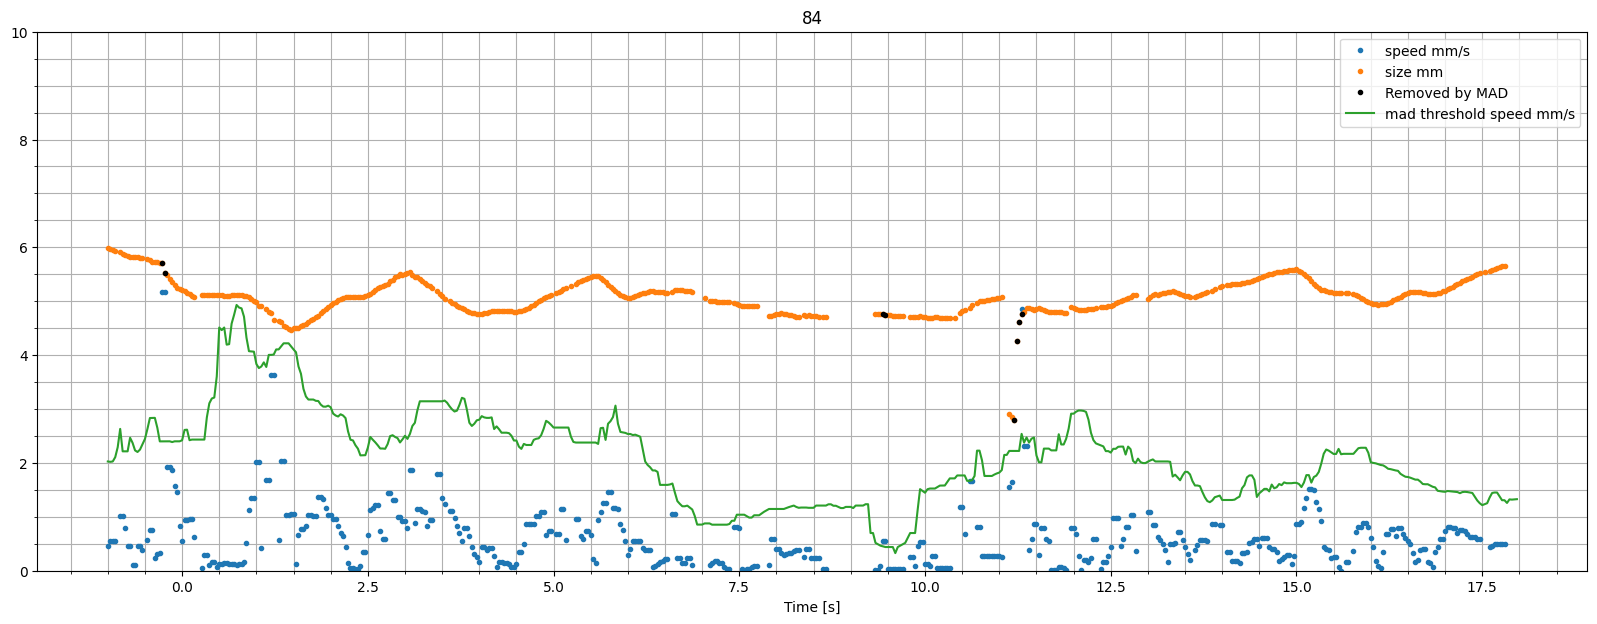

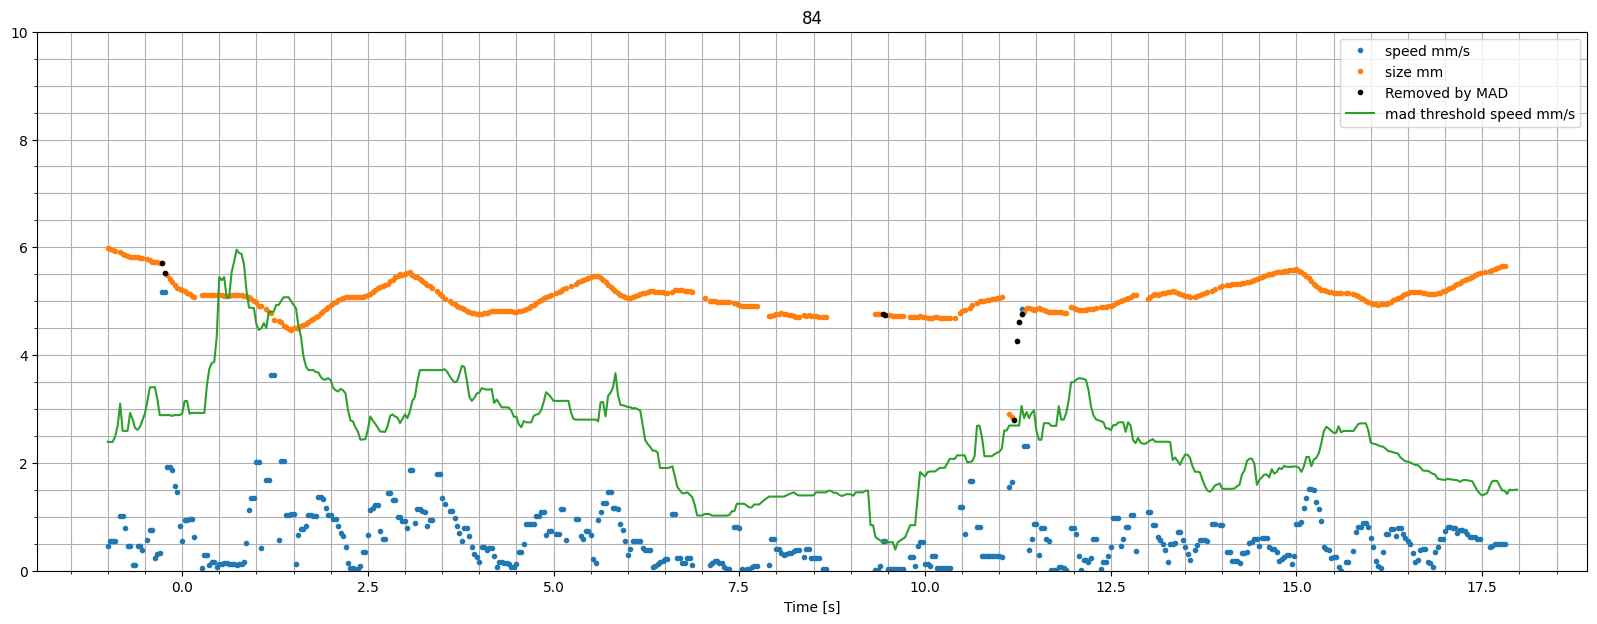

In [9]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[84], window=windows_to_compare[1], multiplier=multiplier
    )

## <a id='toc3_4_'></a>[Trial 113](#toc0_)

There is a small spike around 1.5 s. Multiplier 7.5 works the best, as it removes only points from the spike.

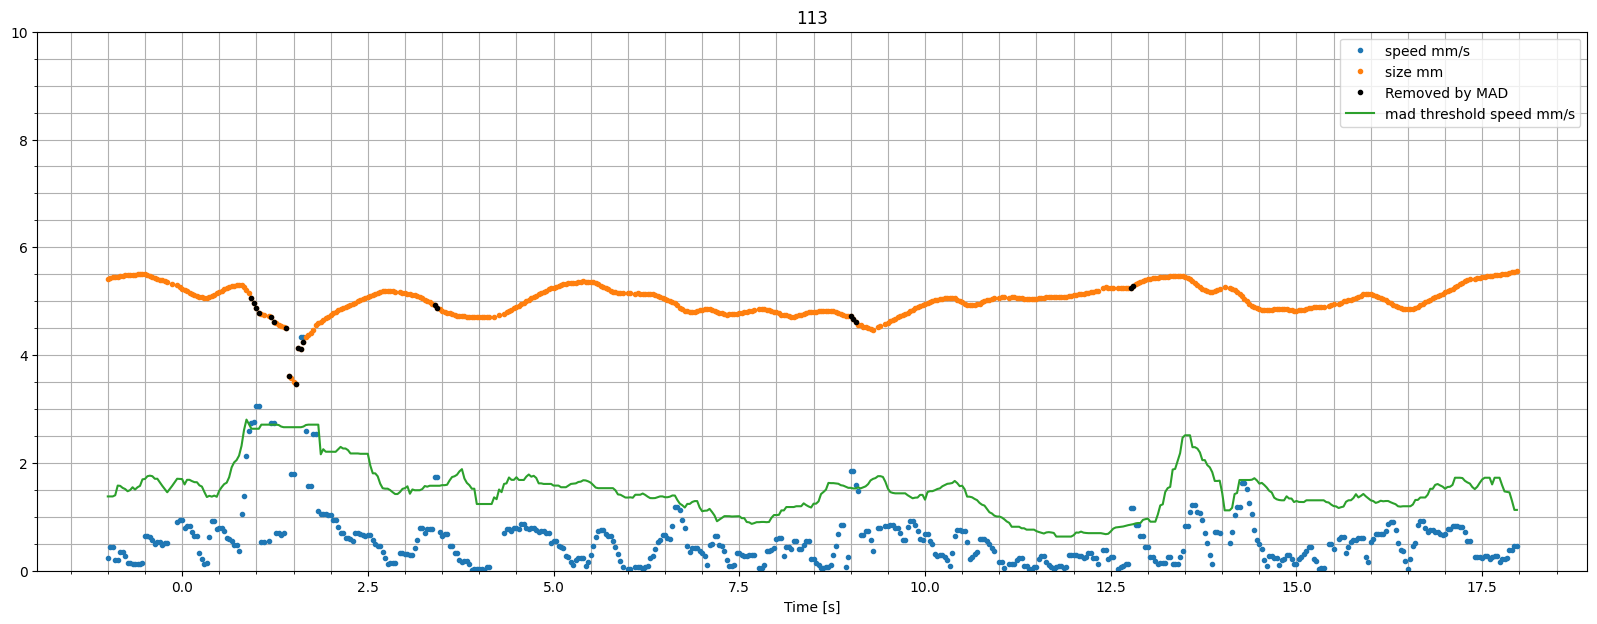

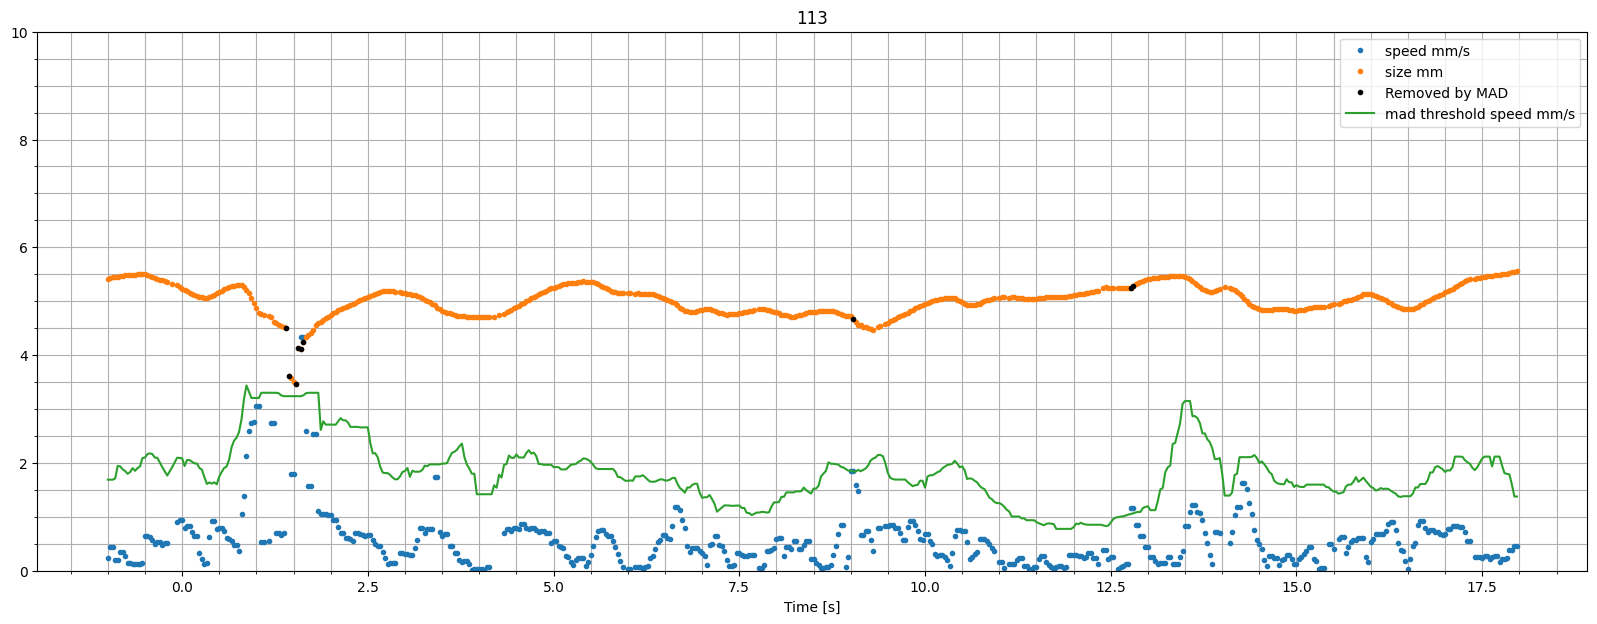

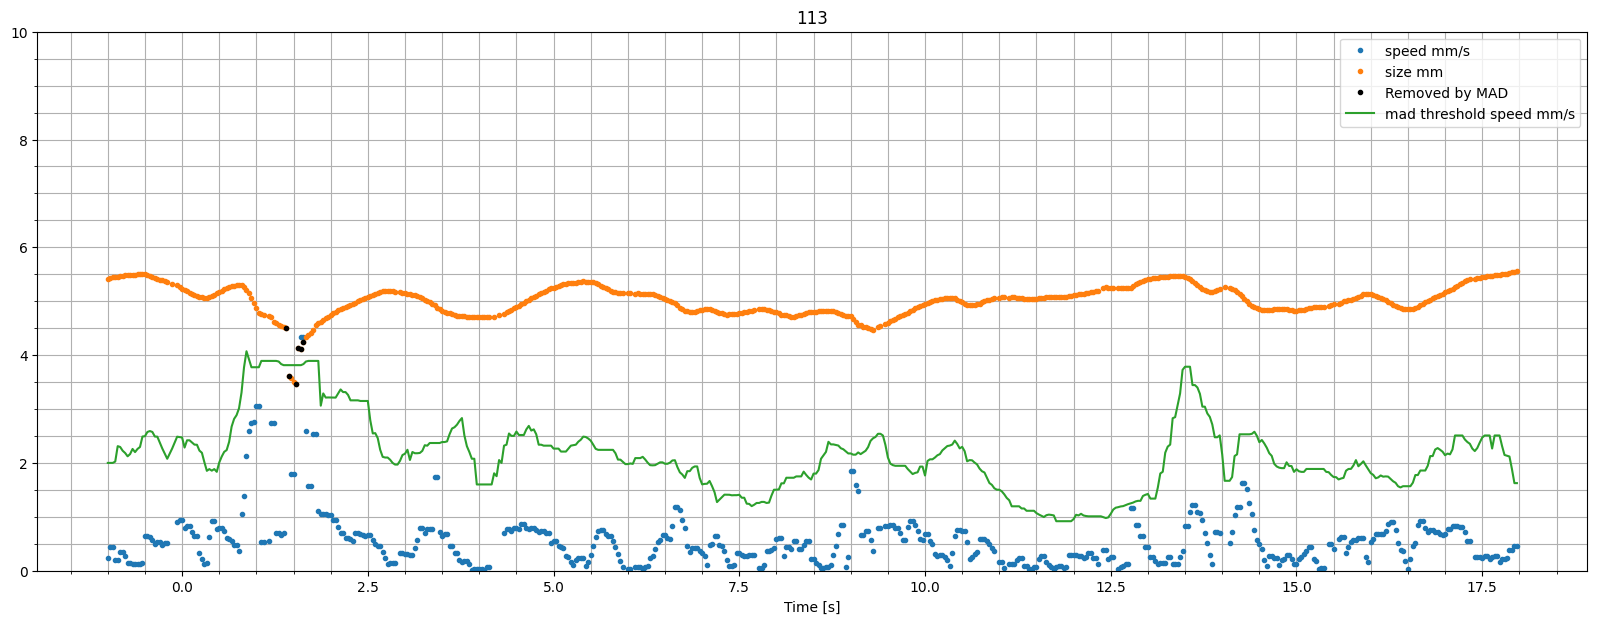

In [10]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df,
        trials_to_vis=[113],
        window=windows_to_compare[1],
        multiplier=multiplier,
    )

# <a id='toc4_'></a>[Comparison of multiplier effect with window size 60 samples](#toc0_)

The trials I choose to visualise are 55, 80, 84, 113. Multipliers are 4.5, 6, 7.5. Window size for this section is 60 samples, which corresponds to 2 s.

## <a id='toc4_1_'></a>[Trial 55](#toc0_)

In this trial, we observe a downward spike-like form around 15.5 s. Here 7.5 removes as much as 6 and 4.5, while it has less false detections.

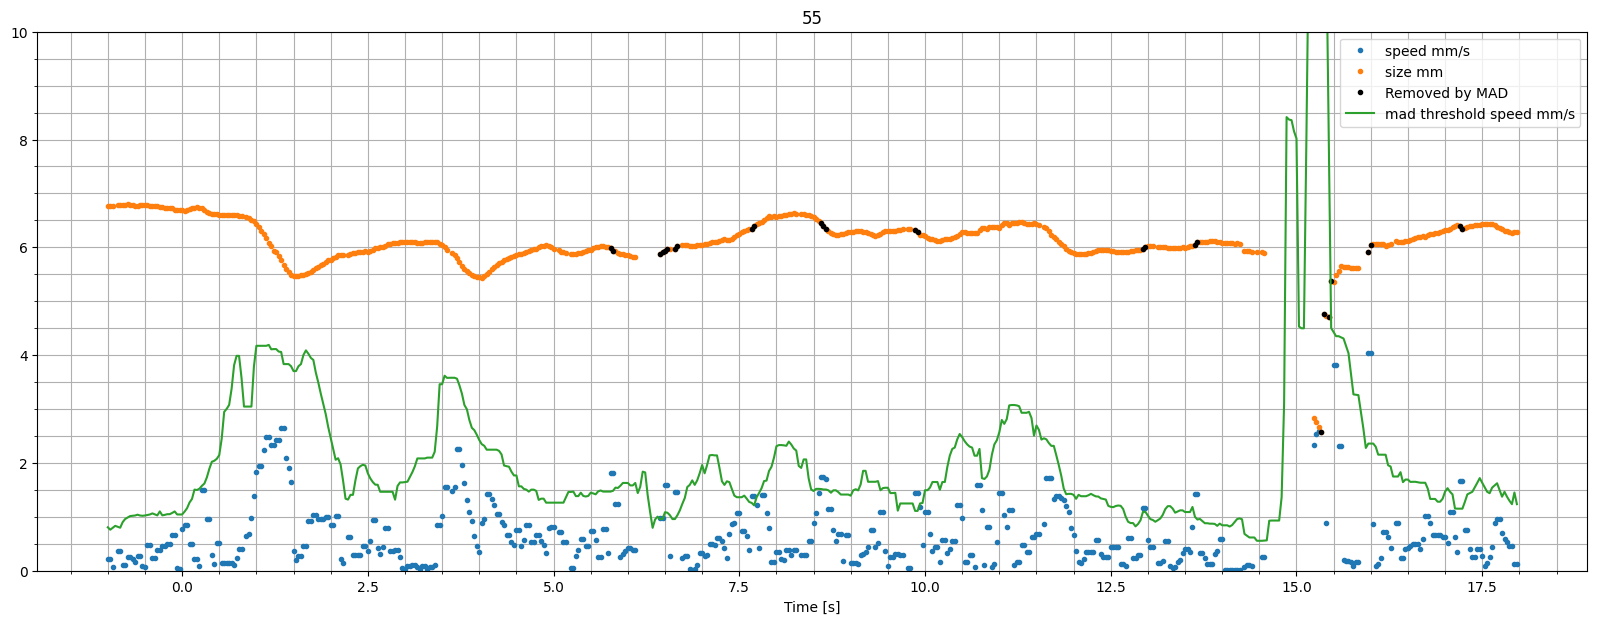

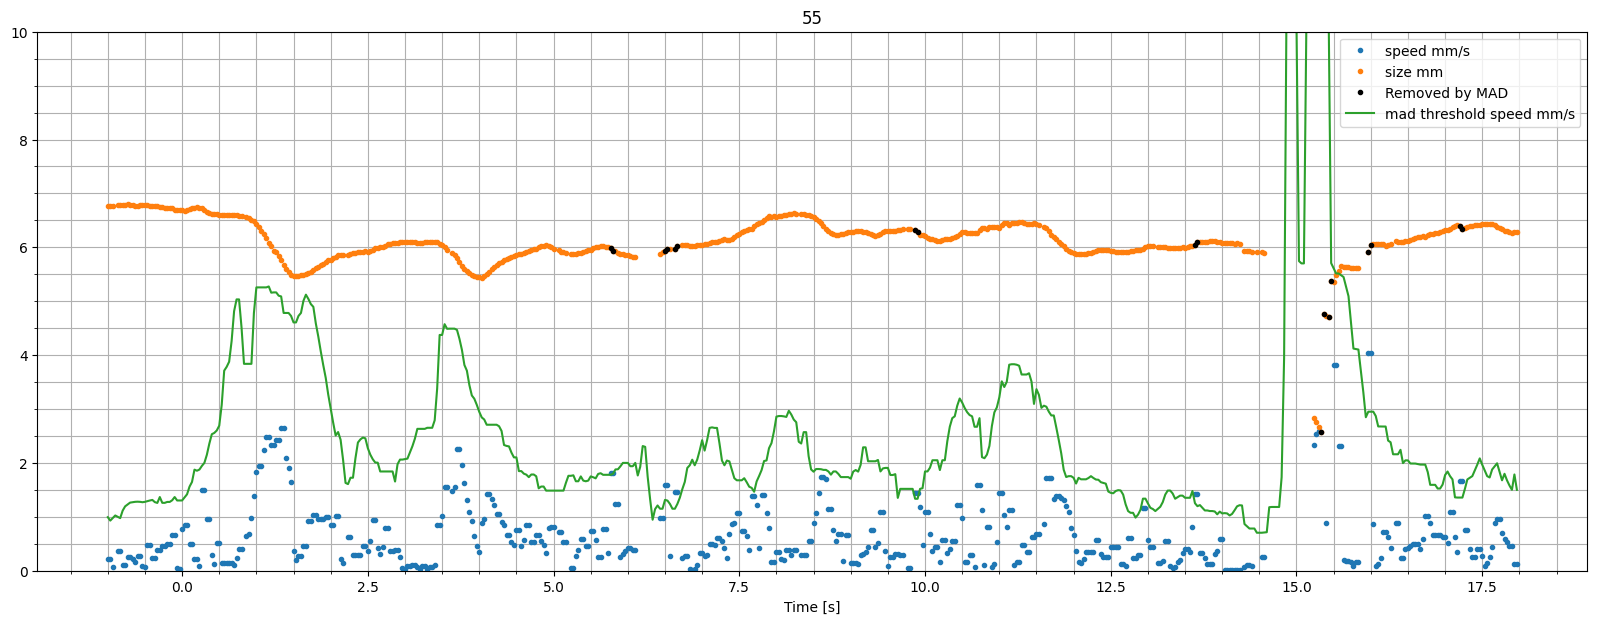

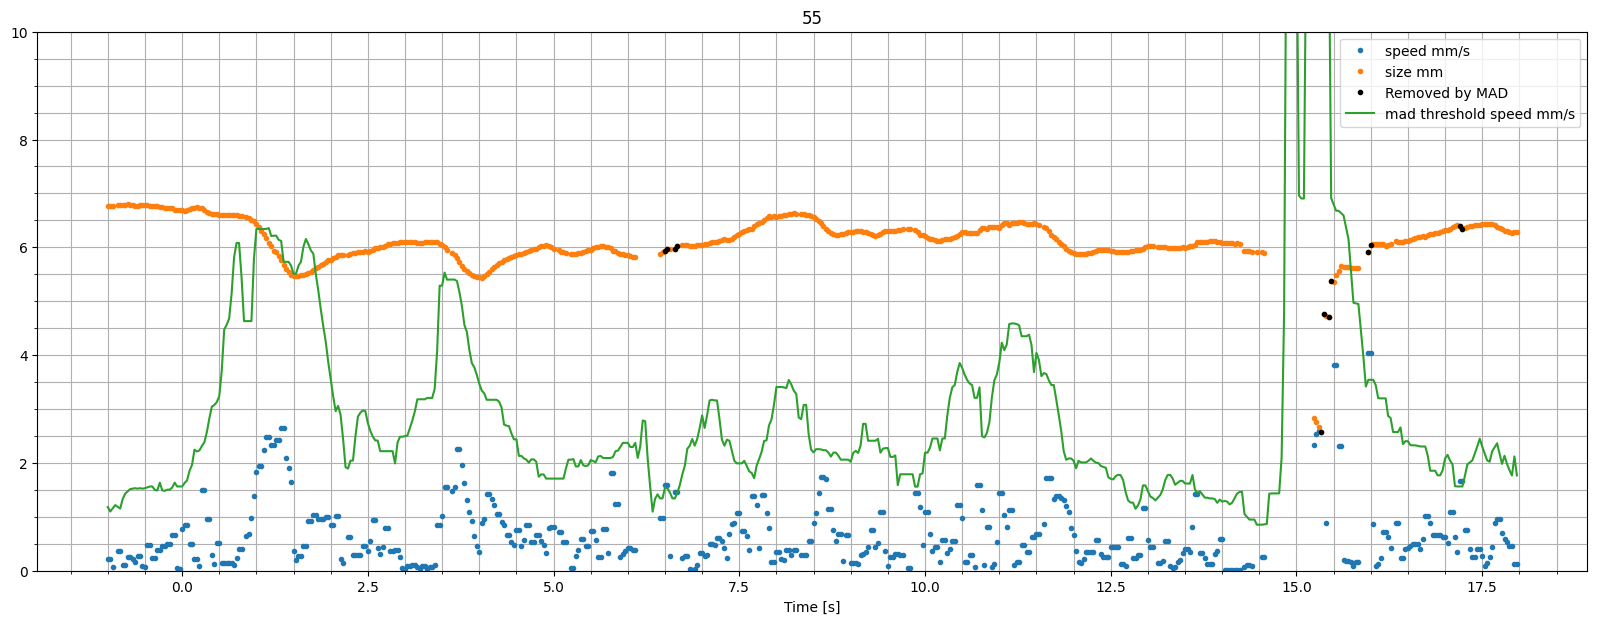

In [11]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[55], window=windows_to_compare[2], multiplier=multiplier
    )

## <a id='toc4_2_'></a>[Trial 80](#toc0_)

Here there is a downward spike around 14.5 s. Multiplier 6 removes all of the spike and doesn't have much more false detections than 7.5.

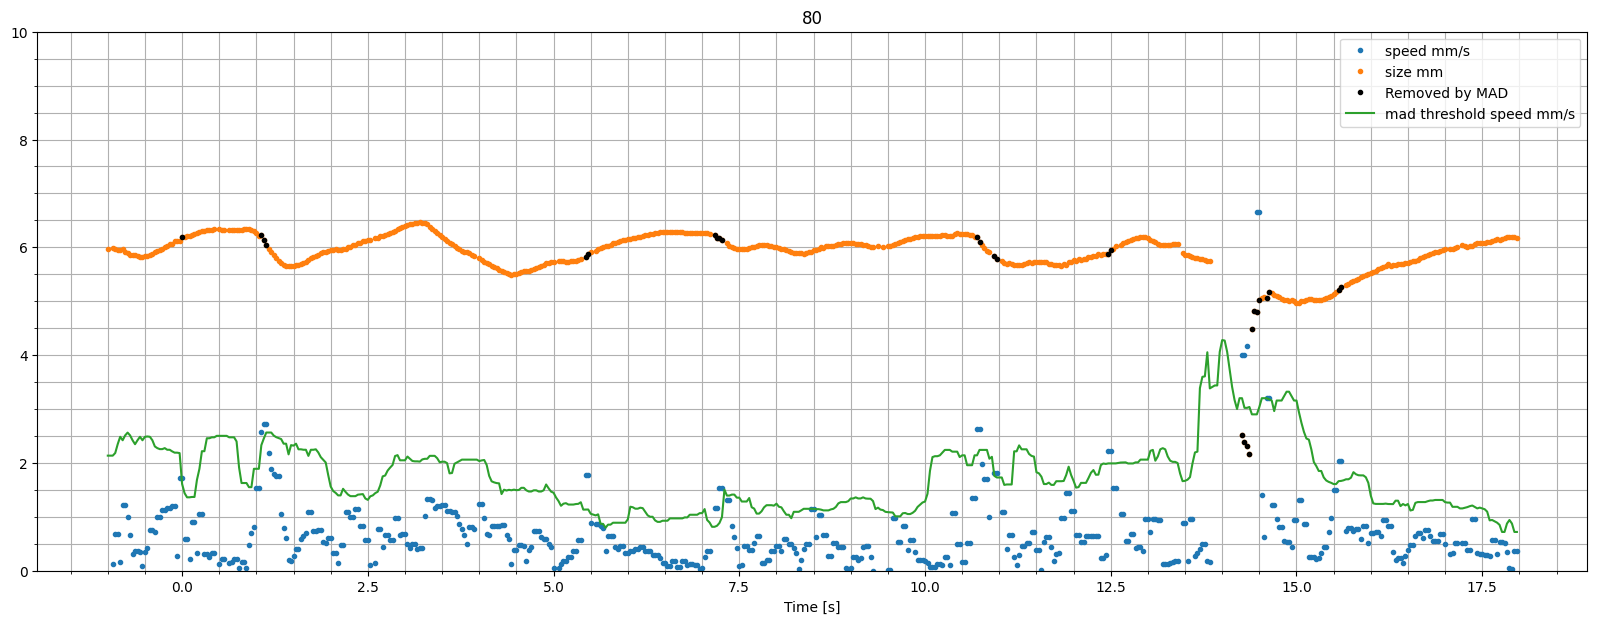

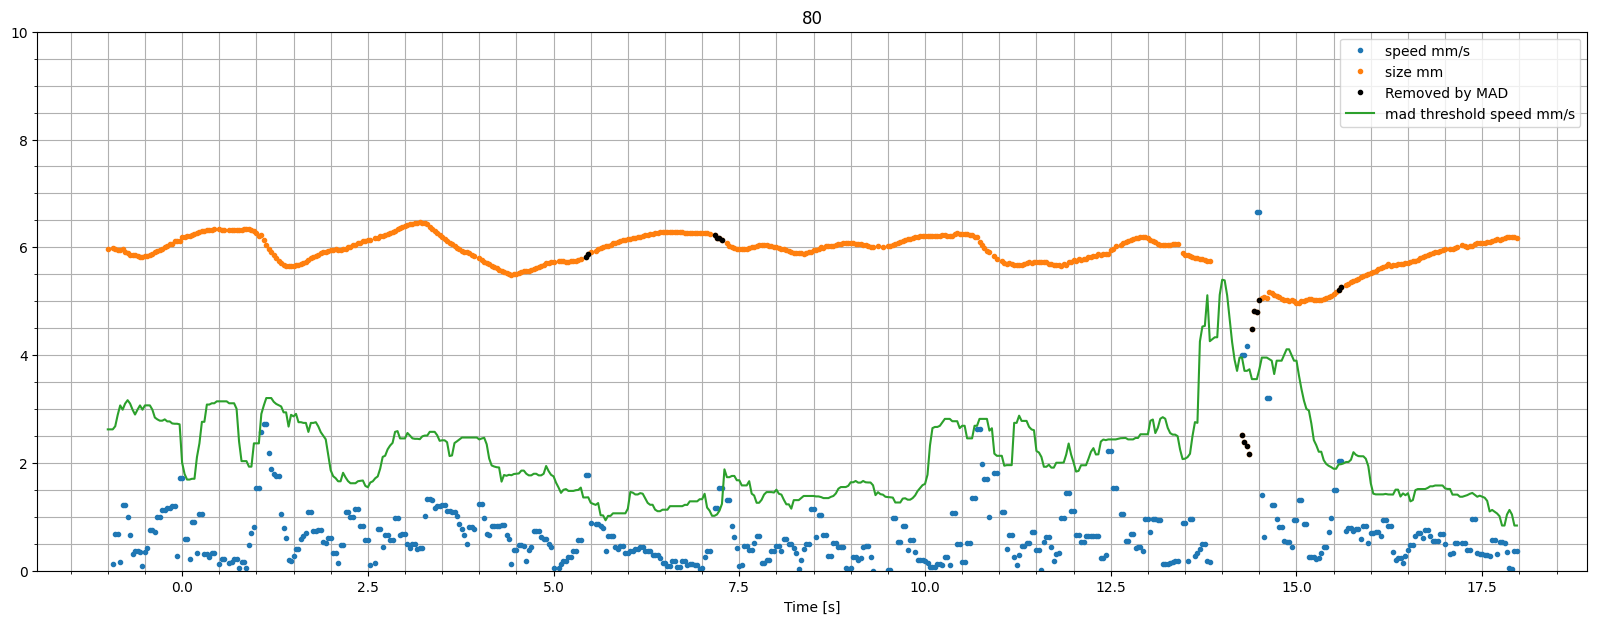

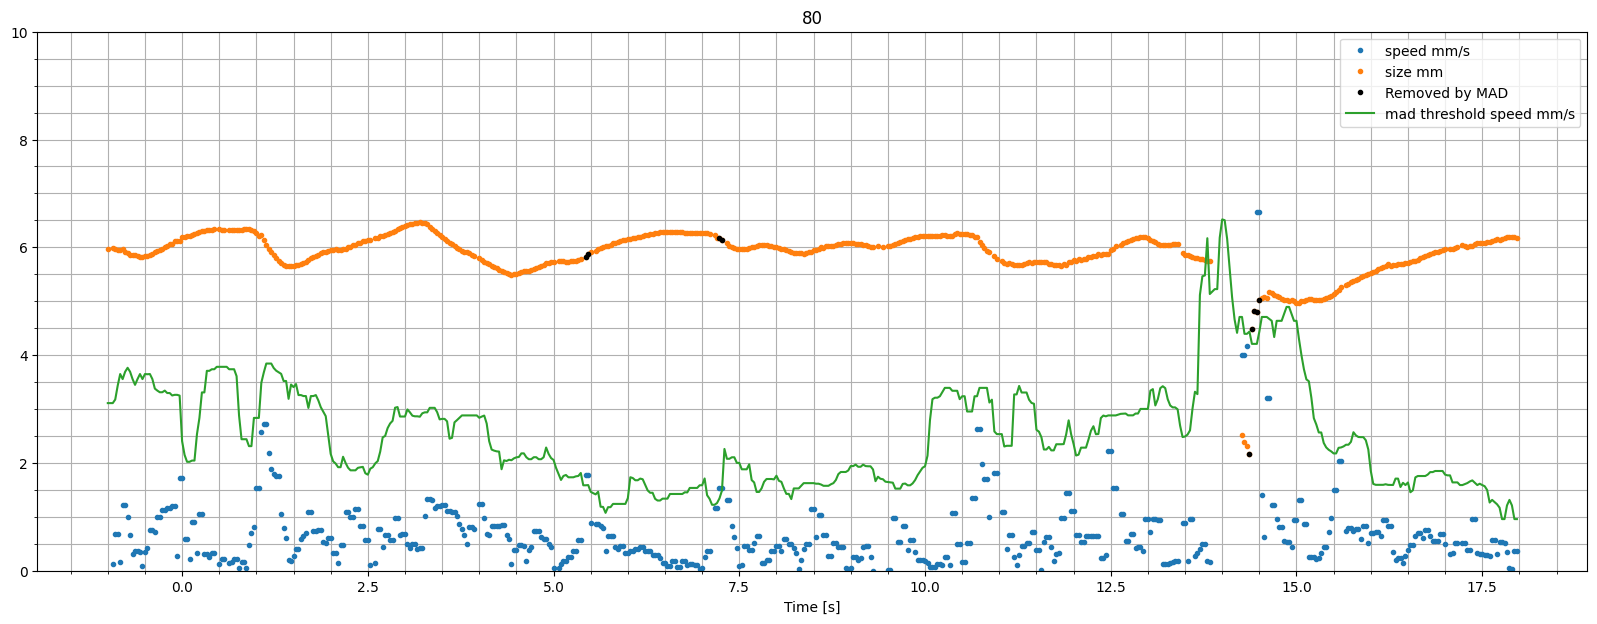

In [12]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[80], window=windows_to_compare[2], multiplier=multiplier
    )

## <a id='toc4_3_'></a>[Trial 84](#toc0_)

Here we observe a spike around 11 s. Multiplier 7.5 appears to work best.

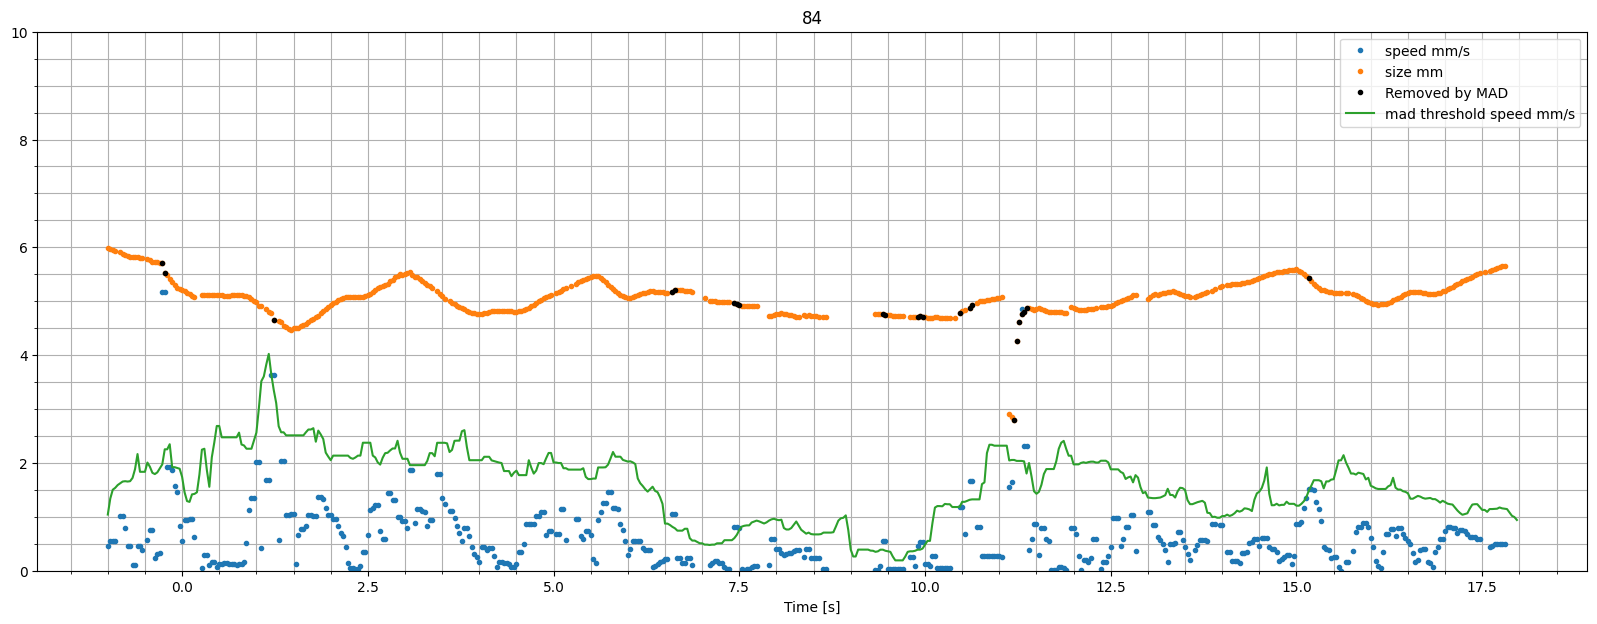

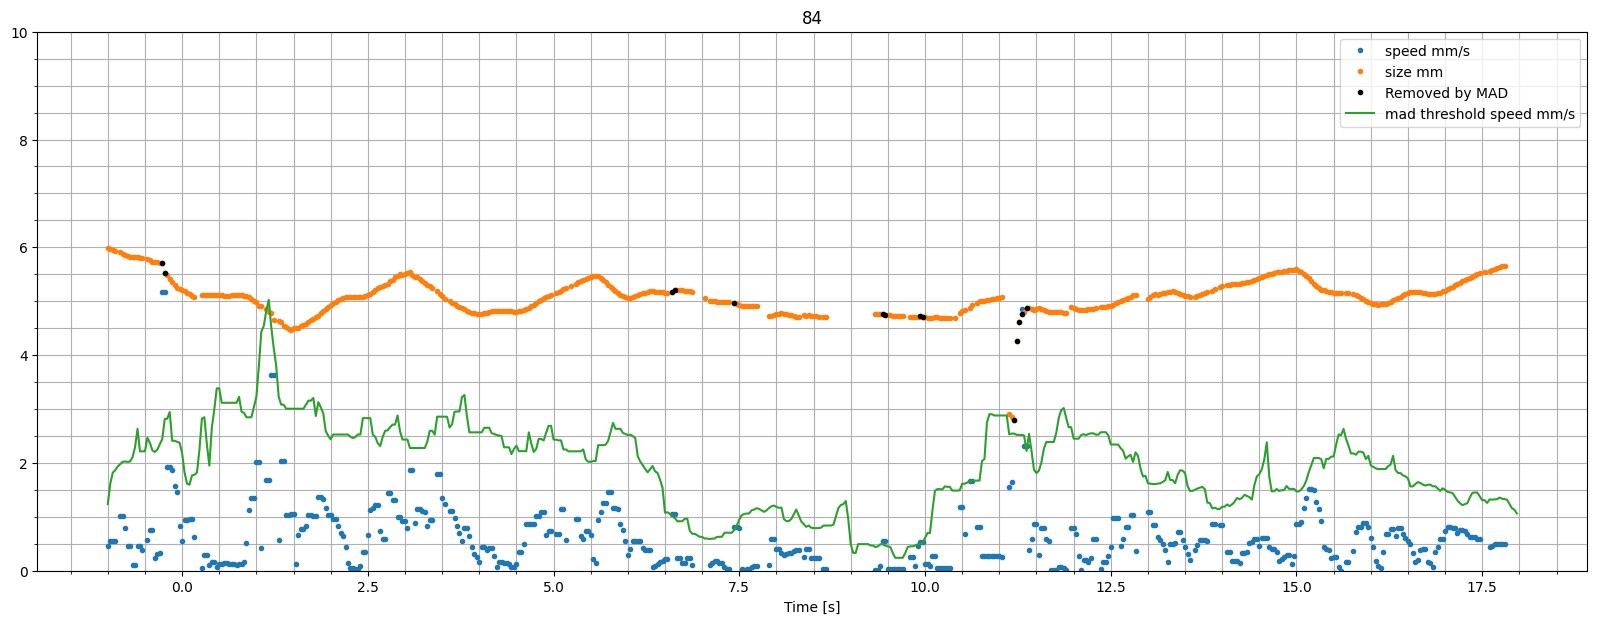

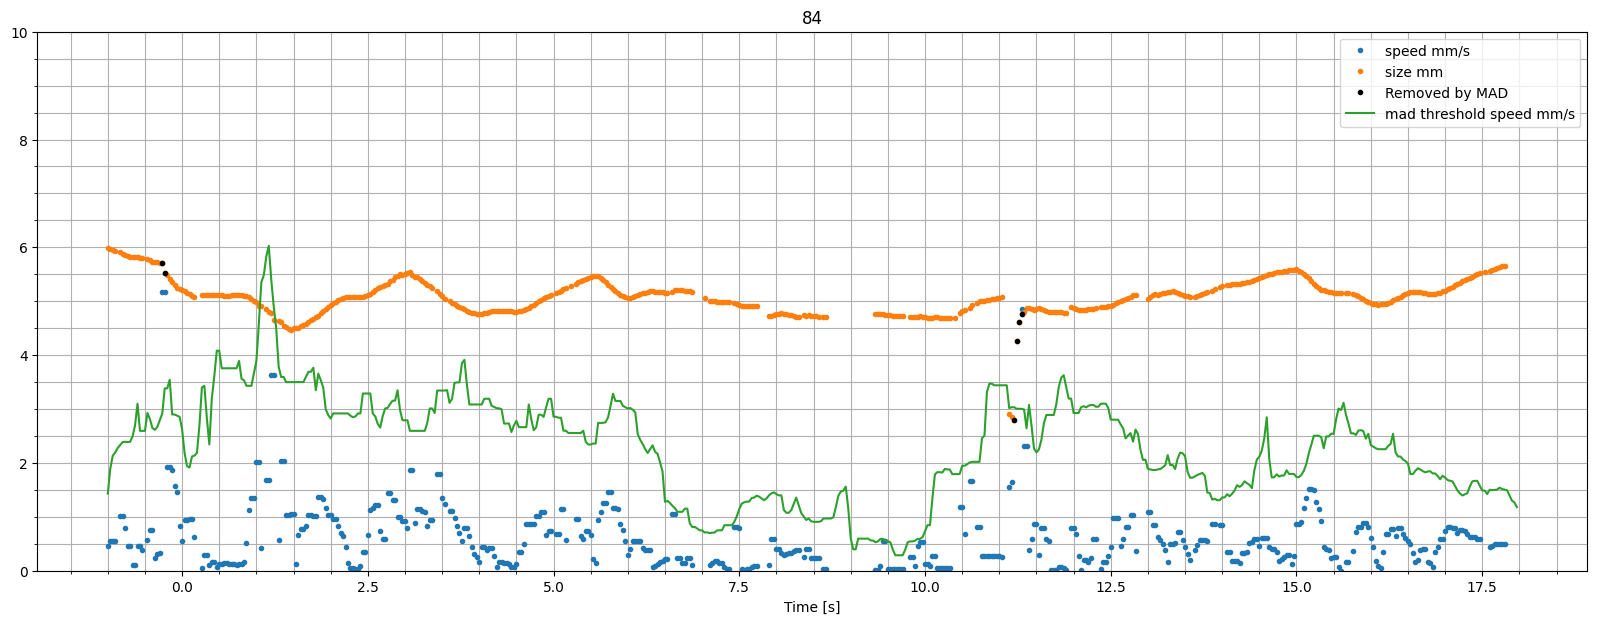

In [13]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df, trials_to_vis=[84], window=windows_to_compare[2], multiplier=multiplier
    )

## <a id='toc4_4_'></a>[Trial 113](#toc0_)

There is a small spike around 1.5 s. Multiplier 6 appears to provide the best trade-off, as it removes a potentially problematic edge of the spike but retains more data.

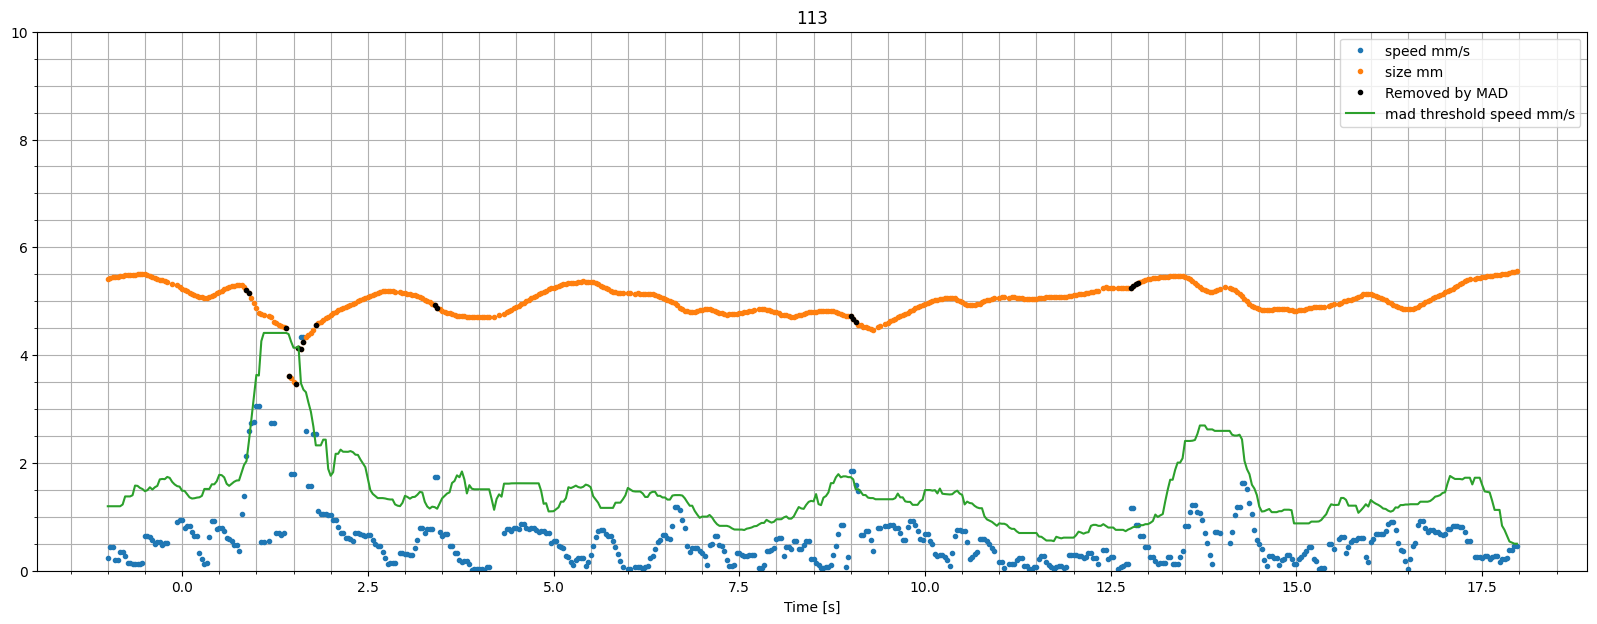

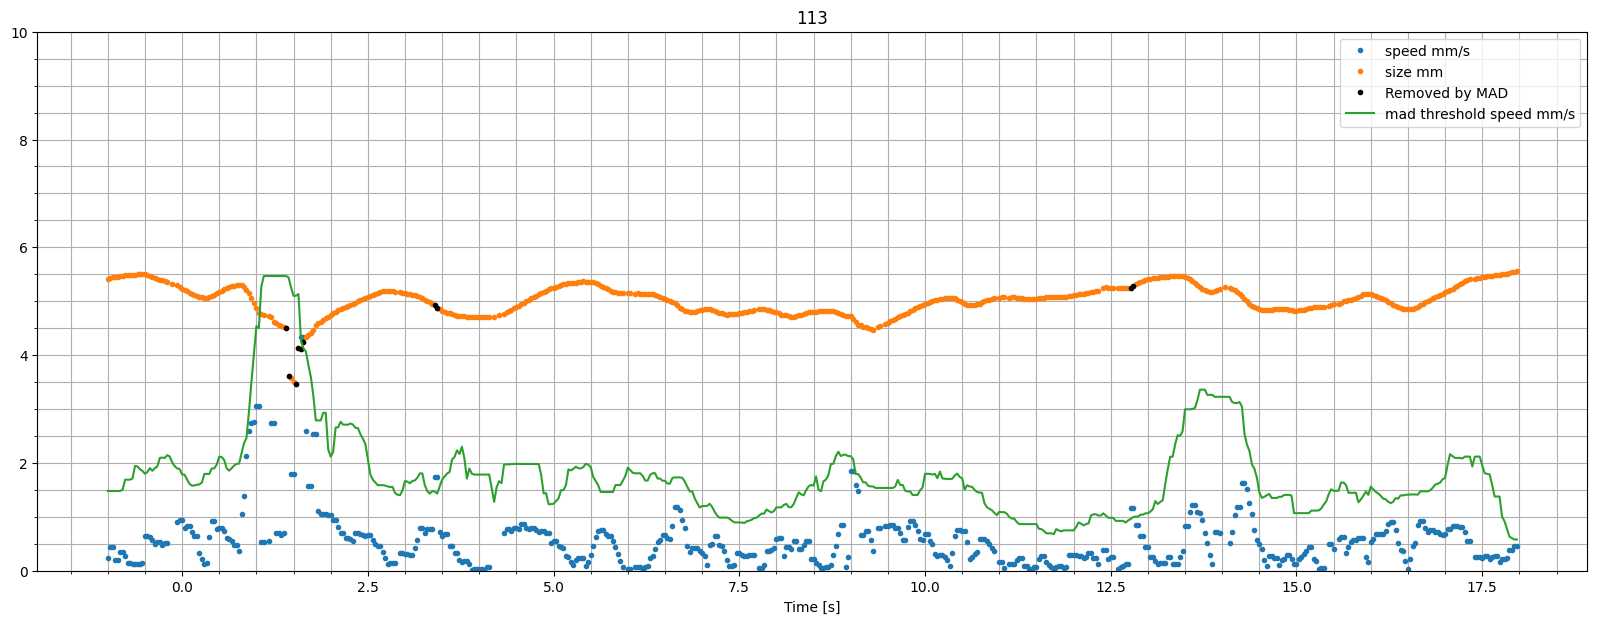

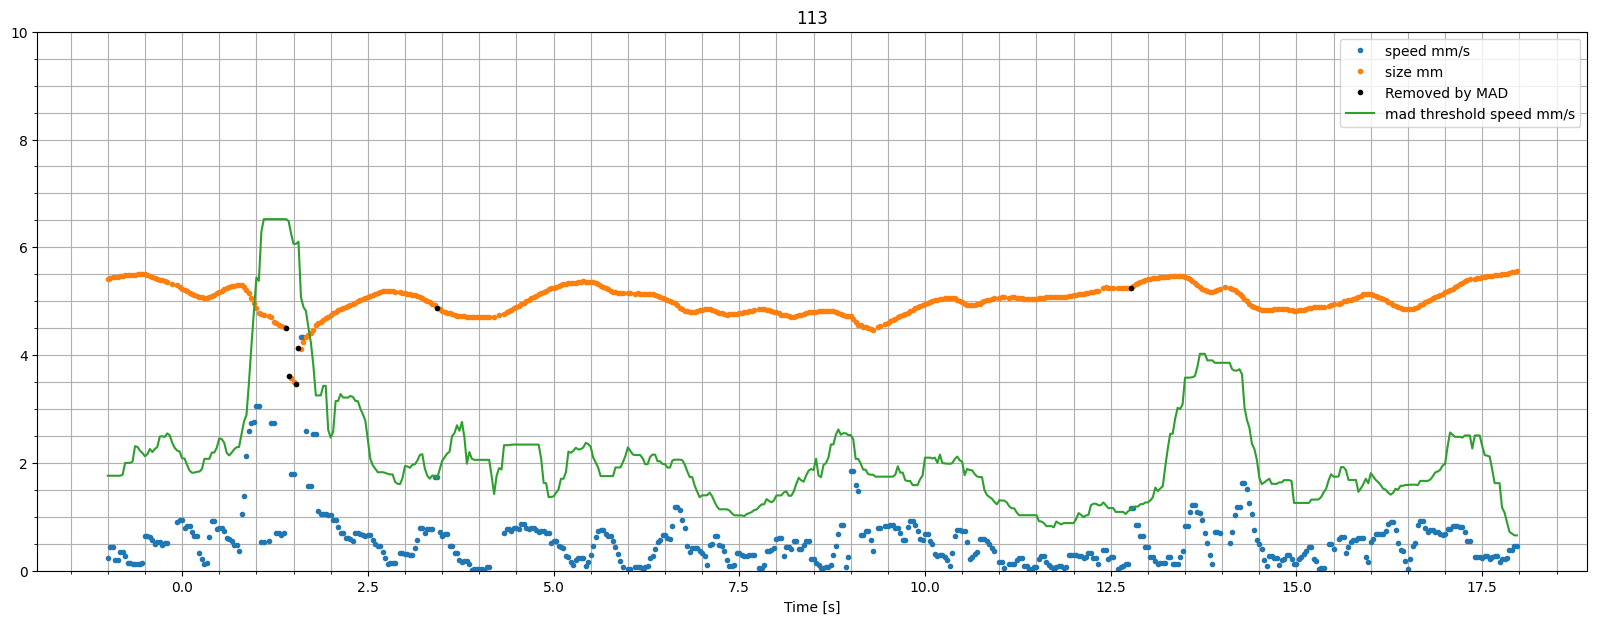

In [14]:
for multiplier in multipliers_to_compare:
    vis.plot_rolling_velocity_MAD(
        data_df,
        trials_to_vis=[113],
        window=windows_to_compare[2],
        multiplier=multiplier,
    )

# <a id='toc5_'></a>[Conclusion](#toc0_)

From visual inspection of trials, it can be seen that cases are not exactly uniform, however window size 60 and multiplier value 6 seem to provide the 'happy medium' - where a lot of the spikes are fairly strongly cleaned up but not too much of the good signal is lost. I will test it as well on a trial with a spike from participant 201 to see how these specifications perform on another participant.

# <a id='toc6_'></a>[Participant 201, window 60, multiplier 6](#toc0_)

In [15]:
participant_id = 201

data_dir = "./results/resampled/"  # directory with resampled data
data_suffix = "_nonan_30_resampled_data.csv"  # name of file with 30 Hz resampled data from participant 2xx, name format: 2xxdata_suffix

data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
data_df = pd.read_csv(data_path)

multipliers_to_compare = [4.5, 6, 7.5]
windows_to_compare = [30, 60, 45]
trials_to_vis = [185]

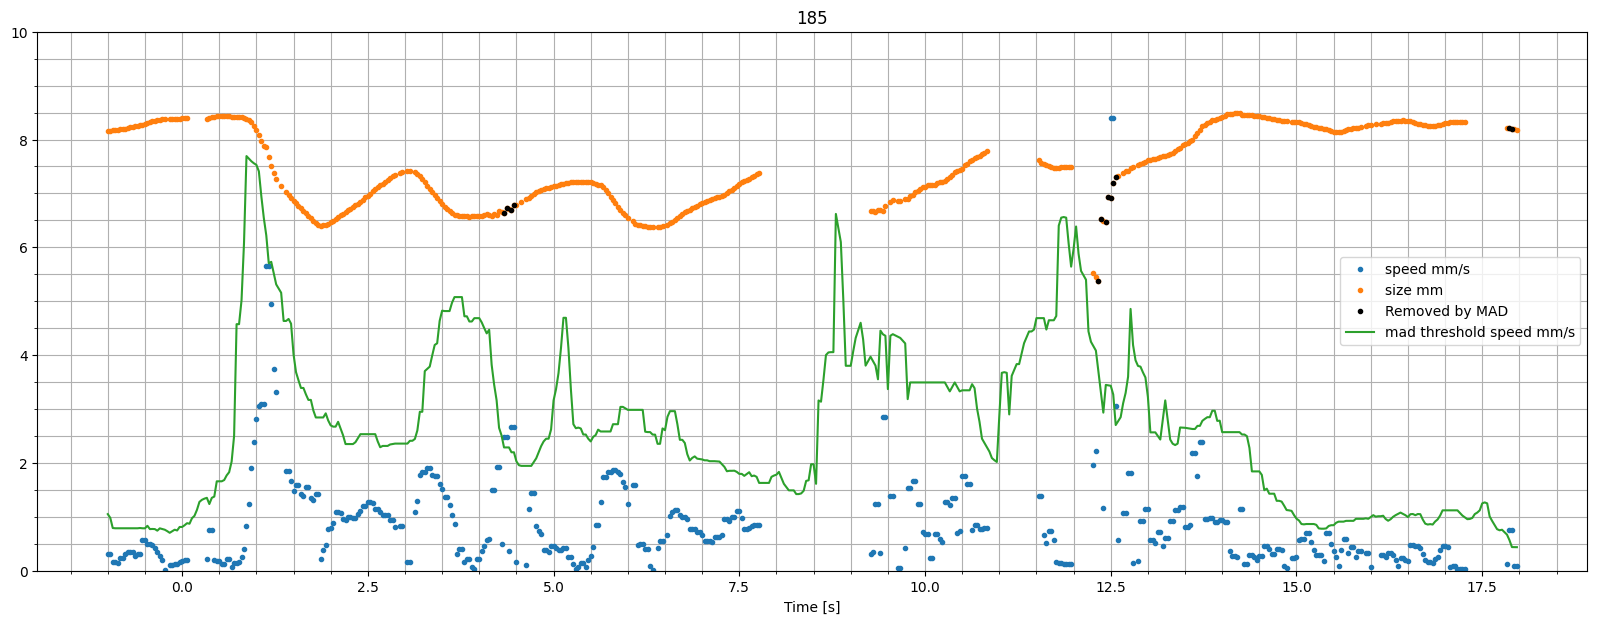

In [16]:
vis.plot_rolling_velocity_MAD(
    data_df, trials_to_vis=trials_to_vis, window=60, multiplier=6
)

These specifications appear to work well, there are only two small points of false detections while the spike is almost completely removed.

# <a id='toc7_'></a>[Demonstration of pipeline effectiveness with velocity MAD window=60, multiplier=6 and size MAD window=60, multiplier=4.5](#toc0_)

Presented as interpolated data to showcase improvement in interpolation from artefact removal. Participant 213, trials 55, 80, 84, 113.

In [17]:
participant_id = 213

data_dir = "./results/resampled/"  # directory with resampled data
data_suffix = "_nonan_30_resampled_data.csv"  # name of file with 30 Hz resampled data from participant 2xx, name format: 2xxdata_suffix

data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
data_df = pd.read_csv(data_path)

trials_to_vis = [55, 80, 84, 113]

In [ ]:
cleaned_velo_df = prep.remove_artefacts_rolling_velocity_mad(
    data_df, multiplier=6, window=60
)

In [ ]:
cleaned_size_df = prep.remove_artefacts_rolling_size_mad(cleaned_velo_df)

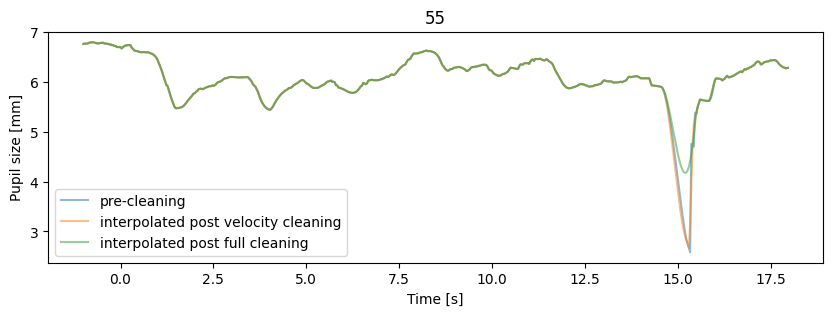

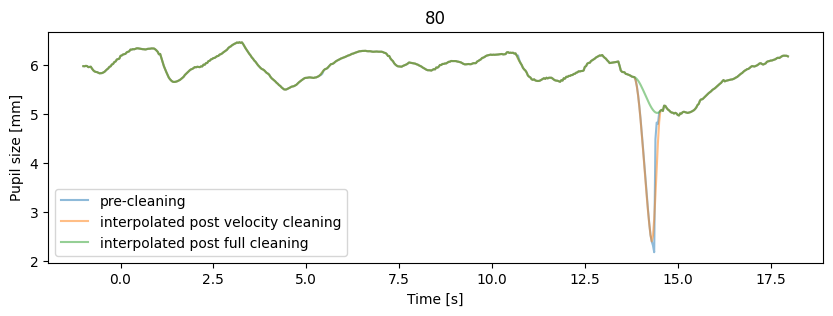

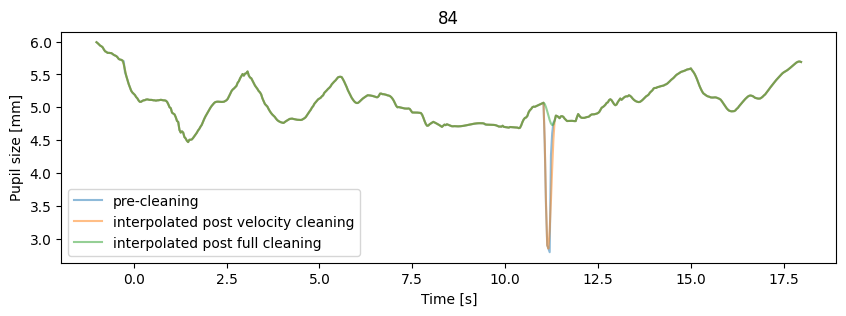

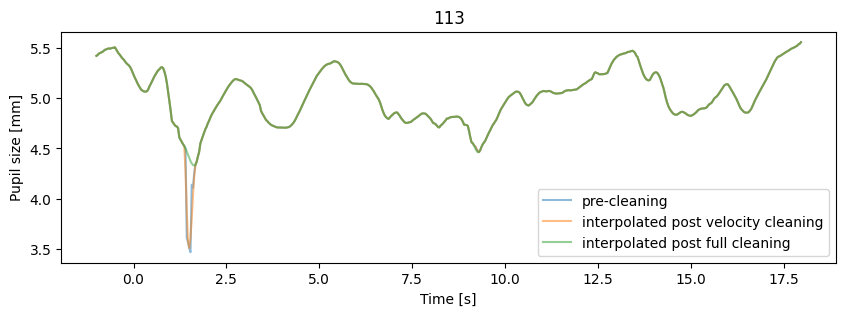

In [ ]:
import matplotlib.pyplot as plt

for trial in trials_to_vis:
    interpolated = cleaned_size_df[cleaned_size_df["Trial no"] == trial].interpolate(
        "cubicspline"
    )
    interpolated_pre_clean = data_df[data_df["Trial no"] == trial].interpolate(
        "cubicspline"
    )
    interpolated_post_velo = cleaned_velo_df[
        cleaned_velo_df["Trial no"] == trial
    ].interpolate("cubicspline")
    plt.figure(figsize=(10, 3))

    plt.plot(
        interpolated_pre_clean["Trial time Sec"],
        interpolated_pre_clean["Stim eye - Size Mm"],
        alpha=0.5,
        label="pre-cleaning",
    )
    plt.plot(
        interpolated_post_velo["Trial time Sec"],
        interpolated_post_velo["Stim eye - Size Mm"],
        alpha=0.5,
        label="interpolated post velocity cleaning",
    )
    plt.plot(
        interpolated["Trial time Sec"],
        interpolated["Stim eye - Size Mm"],
        alpha=0.5,
        label="interpolated post full cleaning",
    )
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Pupil size [mm]")
    plt.title(str(trial))
    plt.show()

It can be seen that only in 55 remnants of the artefact remain in the signal after full cleaning, still the spike is flatter and rounder, which is a welcome effect. For the rest of the examples, the spikes appear to be completely removed. This concludes this calibration and I keep up my recommendation of window size 60, multiplier 6 for velocity-based MAD, and window size 60, multiplier 4.5 for size-based MAD.